MDE Techniken
Omnilab ist MDe

Code generation 
MDE ander beschrieben asl MBSE
MDE eher inklusiv

digital thread
digital companion

Threads to validity -- Model driven begriff-> what did we do?
geometric kinematics

logical vs physical why
AutomationML


Code generation meistens mit Modellen, die SE beschreiben

- bei domain_slcp_barchart und domain_tt_barchart sind außerdem die legenden-Werte abgeschnitten
- domain_tt_barchart beinhaltet übrigens glaube ich NICHT die TTs, sondern was andres



- TTs und Domains: einheitliche Sortierung der einzelnen TTs/Domänen über verschiedene Grafiken hinweg 
- Generell: einheitliche Größe der Grafiken
- Domains: würde hier in den detaillierteren Grafiken nur mehr folgende Domänen verwenden: Manufacturing, Transportation and Storage, Accomodation. Eventuell noch Electricity und Education, aber die haben halt nur 4 und 3 Ergebnisse insgesamt...würd ich eher auch weglassen


- full json TODO... dann generate all again

# packages

In [2]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [51]:
destination_folder = 'target/img/scatter/'
fileformat = ".pdf"
input_json = "target/json/data_consolidated_semistructured__4.json"

In [4]:
figwidth = 12
figheight = 8
barlabelsize = 18

# imports

In [5]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from textwrap import wrap


In [6]:
params = {'legend.fontsize': 'x-large',
        'axes.labelsize':'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large',
        'font.size': 13}
for key in params:
        plt.rcParams[key] = params[key]

# Read data variable from csv

In [7]:
df = pd.read_csv(filepath_or_buffer="data/04 extraction consolidation results_reduced.csv", sep=";")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
yeardata = data.drop_duplicates('Title')
yeardata = yeardata[yeardata['Title'].notna()]
yeardata = yeardata.reset_index()

del metadata
del df
del titles

In [8]:
yeardata.shape

(47, 27)

In [9]:
df2 = pd.read_csv("data/04 extraction consolidation results_reduced.csv", sep="|")

In [10]:
yearless = {'A digital twin-driven hybrid approach for the prediction of performance degradation in transmission unit of CNC machine tool':2022,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A Methodology for Digital Twin Modeling and Deployment for Industry 4.0':2020,
'AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins with AutomationML':2021,
'Closed-Loop Systems Engineering (CLOSE): Integrating Experimentable Digital Twins with the Model-Driven Engineering Process':2018,
'Combining Low-Code Programming and SDL-Based Modeling with Snap! in the Industry 4.0 Context':2021,
'DataTime: a Framework to smoothly Integrate Past, Present and Future into Models':2021,
'Digital Behavioral Twins for Safe Connected Cars':2018,
'Digital Twin of an Electrical Motor Based on Empirical Performance Model':2020,
'Ensuring consistency in scalable-detail models for DT-based control':2021,
'Generating customized low-code development platforms for digital twins':2022,
'Generative and Model-driven SDK development for the Industrie 4.0 Digital Twin':2021,
'Interface Development for Digital Twin of an Electric Motor Based on Empirical Performance Model':2022,
'Knowledge driven rapid development of white box digital twins for industrial plant systems':2021,
'Meta-model-based shop-floor digital twin architecture, modeling and application':2023,
'Model-Driven Development of a Digital Twin for Injection Molding':2020,
'Model-driven engineering city spaces via bidirectional model transformations':2021,
'Supporting Digital Twins for the Retrofit in Aviation by a Model-Driven Data Handling':2023,
'Supporting the Implementation of Digital Twins for IoT-Enhanced BPs':2023,
'The Framework for Designing Autonomous Cyber-Physical Multi-agent Systems for Adaptive Resource Management':2019,
'The OMiLAB Digital Innovation environment: Agile conceptual models to bridge business value with Digital and Physical Twins for Product-Service Systems development':2022,
'Towards a Model-Driven Architecture for Interactive Digital Twin Cockpits':2020,
'Using UML and OCL Models to Realize High-Level Digital Twins':2021}

In [11]:
for index, row in yeardata.iterrows():
    if pd.isna(row['Publication Year']):

        print()
    if row['Title'] in yearless.keys():
        if pd.isna(row['Publication Year']):
            yeardata.at[index, 'Publication Year'] = yearless[row['Title']]
    else:
        if pd.notna(row['Title']) and pd.isna(row['Publication Year']):
            print(row['Title'])


In [12]:
data.columns

Index(['ID', 'Title', 'model processing technique',
       'purpose of MDE application', 'source', 'source category',
       'source sub-category 1', 'source sub-category 2',
       'source model target category', 'target', 'target category',
       'target category 2', 'target sub-category 1', 'target sub-category 2',
       'target model target category', 'use case domain',
       'system lifecycle phase', 'twinning target', 'twin lifecycle phase',
       'Technological Readiness Level', 'Use Case', 'Publication Title',
       'Authors', 'Publication Year', 'Document Identifier', 'Publisher'],
      dtype='object')

In [13]:
#data.drop(['model processing technique', 'source', 'source category', 'source sub-category', 'source model target category', 'target', 'target category', 'target sub-category', 'target model target category', 'use case domain', 'system lifecycle phase', 'twinning target', 'twin lifecycle phase', 'Technological Readiness Level'], axis=1, inplace=True)

In [14]:
data = data[data['Title'].notna()]

In [15]:
data.shape

(105, 26)

In [16]:
yeardata.shape

(47, 27)

In [17]:
df2.shape

(108, 1)

In [18]:
#df2.drop(['Title'], axis=1, inplace=True)

In [19]:
#df2 = df2.reset_index()

In [20]:
#data = data.reset_index()

In [21]:
#data = pd.merge(data, df2, on ='index')

data.head()

# Create Individual Barcharts

occurrences_df = data["model processing technique"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per model processing technique')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.tight_layout()

plt.show()

data["modeling language"].value_counts()

5    2018
4    2019
2    2020
1    2021
0    2022
3    2023
Name: entry, dtype: object : 5     2
4     2
2     8
1    12
0    17
3     6
Name: count, dtype: int64


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\3141126385.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)


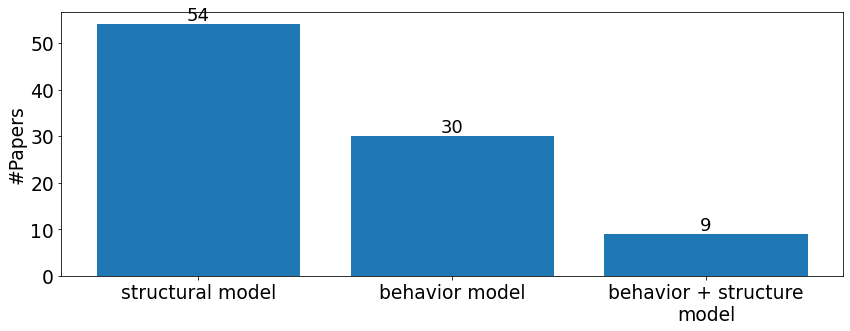

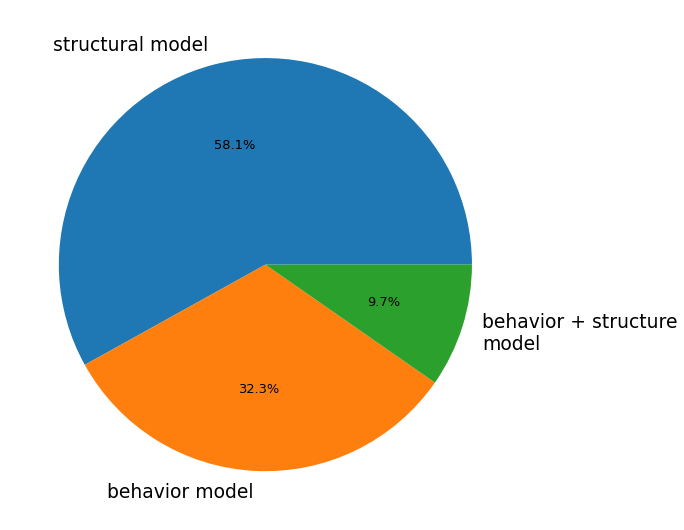

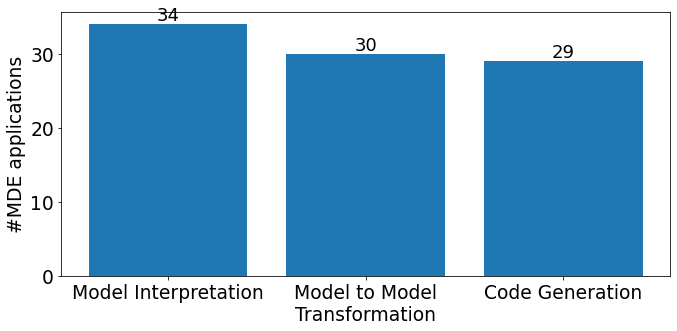

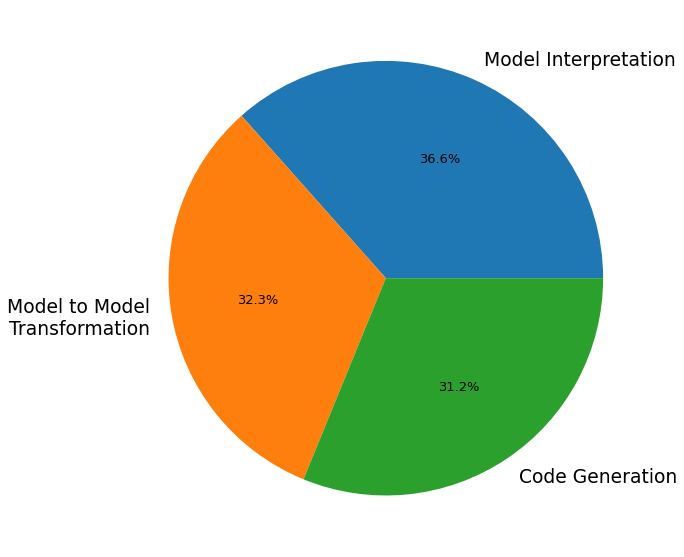

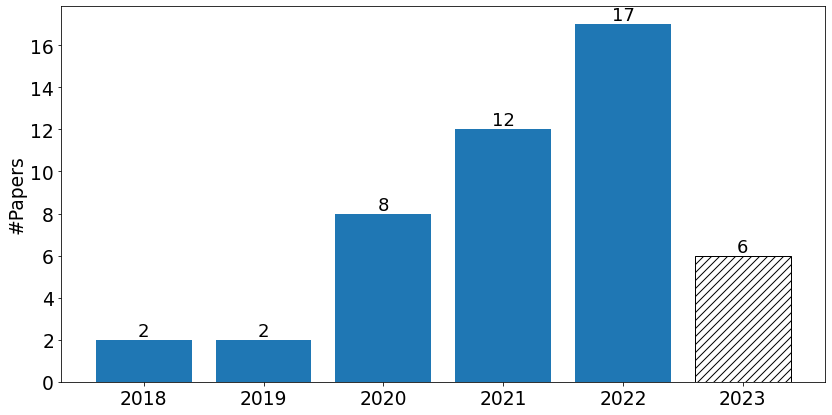

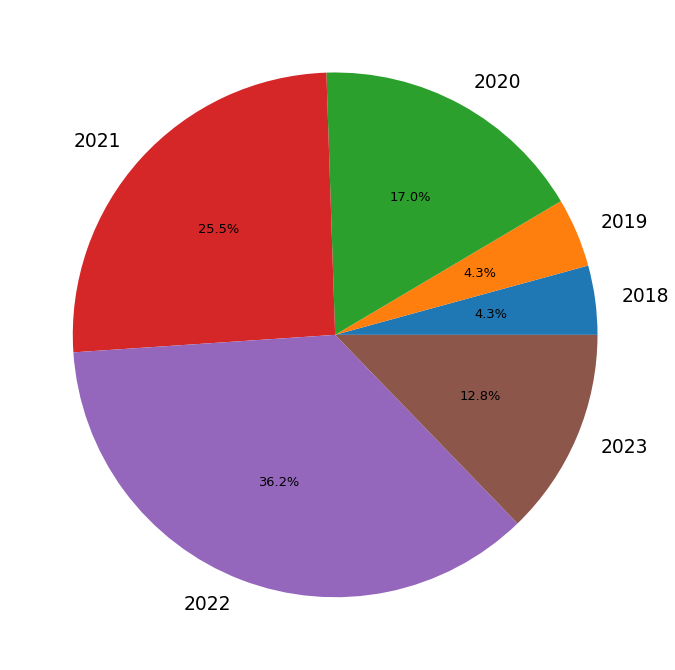

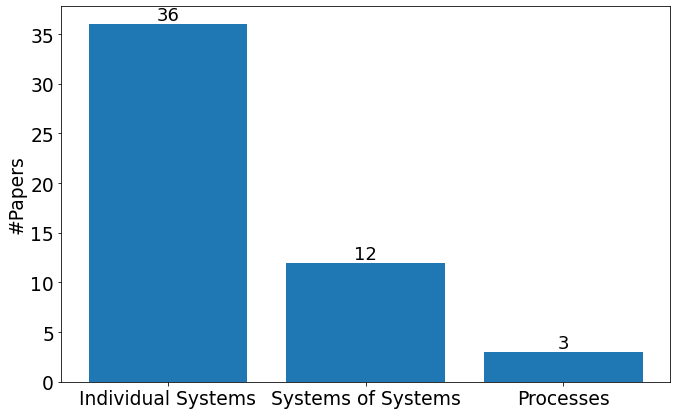

In [172]:
modeling_language = data["source category"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']


yeardata = yeardata.fillna(value={'Publication Year':"0"})
years = yeardata["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int).astype(str)
years['entry'].replace('0', "NAN")

tt = data["twinning target"].value_counts().reset_index()
tt.columns = ['entry', 'count']

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight*0.8)
# List of DataFrames
dataframes = [modeling_language, mde_technique, years, tt]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year', '#Papers per twinning target']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[0])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_piechart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[1])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_piechart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
for index, row in plot_data.iterrows():
    val = int(row['entry'])
    cou = row['count']
    if val < 2023:
        axes.bar(val, cou,color='#1f77b4')
    else:
        axes.bar(val, cou, fill=False, hatch='///')

#fill=False, hatch='///'

  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
print(plot_data['entry'], ":", plot_data['count'])
axes.set_ylabel("#Papers")
#axes.set_title(titles[2])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)
for container in axes.containers:
    axes.bar_label(container, fontsize=barlabelsize)


# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_barchart"+ fileformat)
# plt.savefig(destination_folder+"3 Papers per Year"+ fileformat) - don't use for now

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[2])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_piechart"+ fileformat)
# plt.savefig(destination_folder+"3 Papers per Year"+ fileformat)  - don't use for now

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TT_barchart"+ fileformat)


In [173]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


In [174]:
import re

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2784957179.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


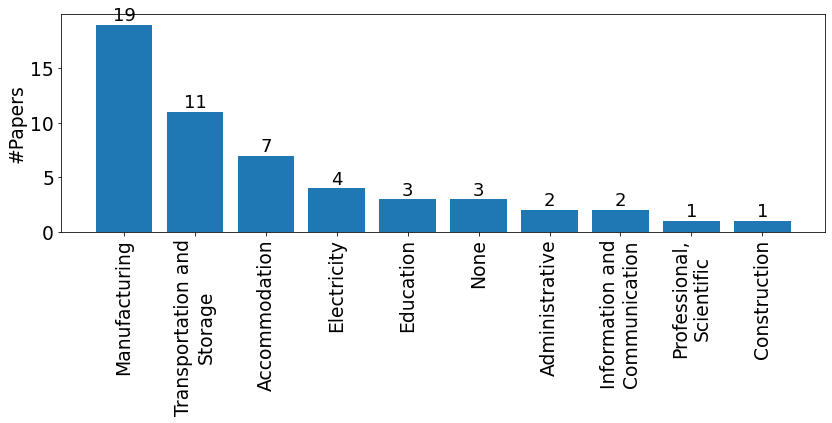

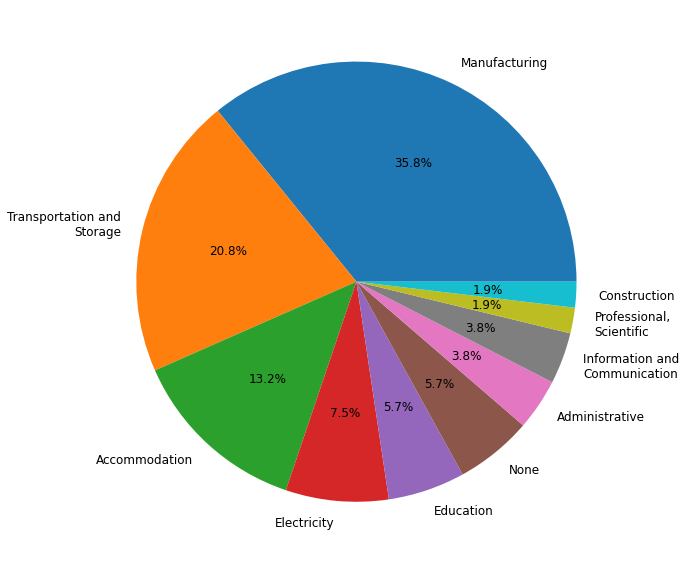

In [175]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
plot_data = dataframes[0]

entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%',textprops={'fontsize': 12})
#axes.set_title(titles[0])
plt.tight_layout()
plt.savefig(destination_folder+"domain_piechart"+ fileformat)

As-Designed
As-Operated


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2052165929.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


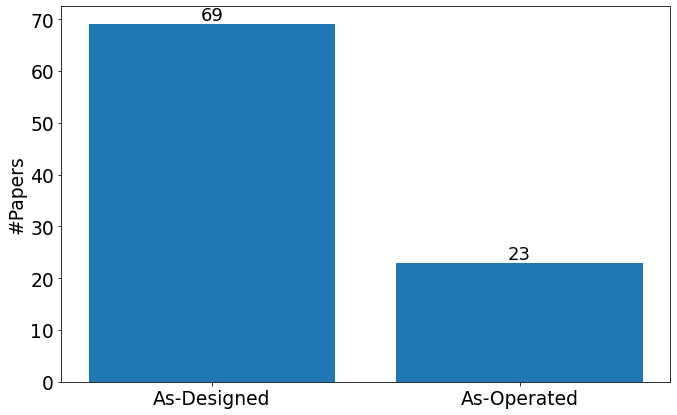

In [176]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

for index, row in plot_data.iterrows():
    if ";" in row['entry']:
        values = row['entry'].split(";")
        for val in values:
            for index2, row2 in plot_data.iterrows():
                if row2['entry'] == val:
                    #change value by +1
                    print(row2['entry'])
                    plot_data.loc[plot_data['entry'].isin([row2['entry']]), 'count']+=1
        plot_data.drop(index, inplace=True)

axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_barchart"+ fileformat)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\56200274.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


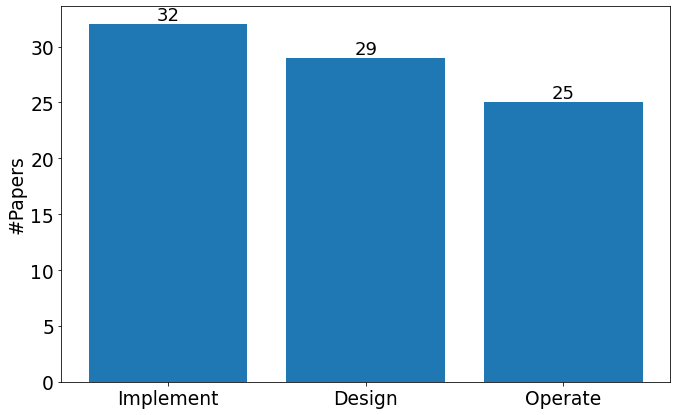

In [177]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[1]
plot_data = plot_data[plot_data['count'] > 2] 
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_barchart"+ fileformat)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2206801927.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


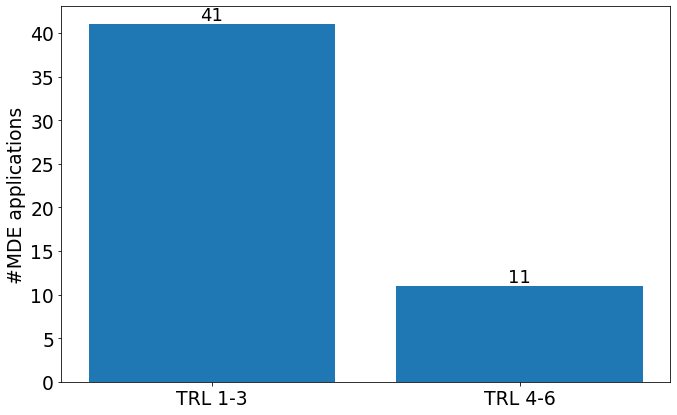

In [178]:


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[4]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[4])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
# Adjust the layout to avoid overlapping titles
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_barchart"+ fileformat)


In [179]:
domains = ['Accommodation', 'Electricity', 'Manufacturing', 'Transportation and Storage']

# Stacked Barcharts with MDE technique per X

occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

In [180]:
figheight = 6

In [181]:
import re

In [182]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])
slcp_tlcp = pd.DataFrame(columns = ['value', 'slcp'])

with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"] if contents["use case domain"] in domains else None
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = contents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)
        
        if (twin_lcp1 is not None):
            if (";" in twin_lcp1):
                for item in twin_lcp1.split(';'):
                    print(item)
                    new_line = pd.DataFrame([{"value": item, "slcp": system_lcp1}])
                    slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)
            else:
                new_line = pd.DataFrame([{"value": twin_lcp1, "slcp": system_lcp1}])
                slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)
        else:
            new_line = pd.DataFrame([{"value": twin_lcp1, "slcp": system_lcp1}])
            slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)

#print(slcp_tlcp)


As-Designed
As-Operated


In [183]:
slcp_tlcp_copy = slcp_tlcp.__deepcopy__()
name = 'slcp_tlcp_scatter'
colname = ['system lifecycle phase', 'twin lifecycle phase']
slcp_tlcp_copy = slcp_tlcp_copy.groupby(['slcp', 'value']).size().unstack().fillna(0).astype('int64')

In [34]:
slcp_tlcp_copy = slcp_tlcp_copy.transpose()[['Design', 'Implement', 'Operate']]

In [35]:
slcp_tlcp_copy

slcp,Design,Implement,Operate
value,,,
As-Designed,27,26,13
As-Operated,2,6,13


In [118]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500)
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

slcp         Design  Implement  Operate
value                                  
As-Designed      27         26       13
As-Operated       2          6       13


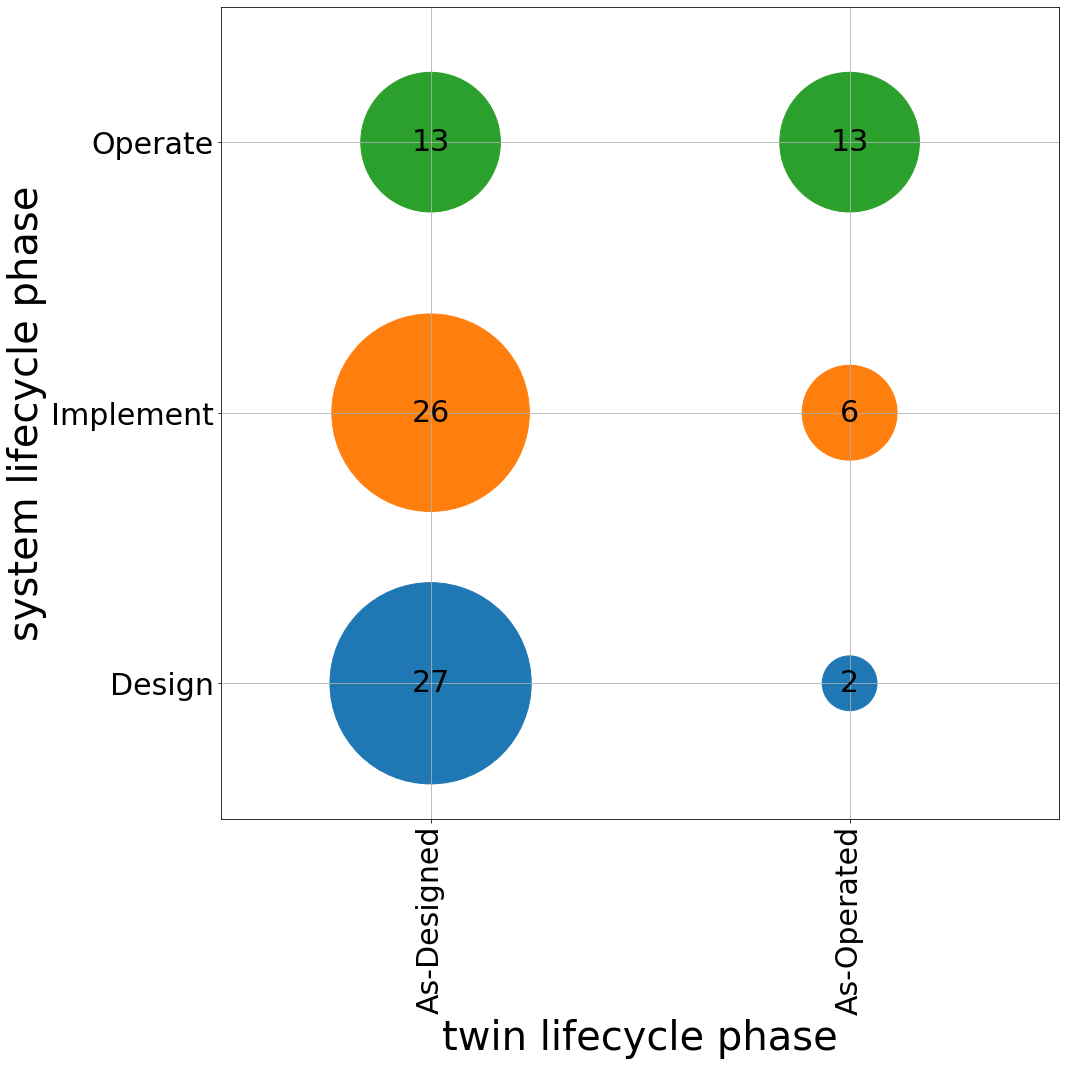

In [119]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
slcp_tlcp_copy = slcp_tlcp_copy
print(slcp_tlcp_copy)
plt.figure(figsize=(15,15))
size_multiplier = 500
scatter_for_df(slcp_tlcp_copy)
plt.xlabel(colname[1], fontsize=40)
plt.ylabel(colname[0], fontsize=40)
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3.5)
plt.tight_layout()
name = "slcp_tlcp_scatter"
plt.savefig(destination_folder + name + ".jpg")

# MDE scatter

In [120]:
todos = [domains_techniques,
system_lcp_techniques,
twin_lcp_techniques,
twinning_target_techniques,
trl_techniques,]
names = ['domain_mde_scatter', 'slcp_mde_scatter', 'tlcp_mde_scatter',
         'tt_mde_scatter', 'trl_mde_scatter']
#slcp_tlcp ]

In [121]:
i = 0
for item in todos:
    print(names[i])
    for col in item.columns:
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
        print(item1.columns)
        print(item1.transpose().columns)
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1
    print("_________")
#        print(item1.columns)
#        print(item1.transpose().columns)

domain_mde_scatter
Index(['Accommodation', 'Electricity', 'Manufacturing',
       'Transportation and Storage'],
      dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
Index(['Accommodation', 'Electricity', 'Manufacturing',
       'Transportation and Storage'],
      dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
_________
slcp_mde_scatter
Index(['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
Index(['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtyp

In [122]:
domains = ['Accommodation', 'Electricity', 'Manufacturing',
       'Transportation\n and Storage']
mdetches = ['Code\n Generation', 'Model\n Interpretation',
       'Model to Model\n Transformation']
trls = ['TRL 1-3', 'TRL 4-6']
systems= ['Individual Systems', 'Processes', 'Systems of\n Systems']
slcs = ['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test']
tlcs = ['As-Designed',  'As-Operated']

In [123]:
colnamePairs = [['use case domain', 'MDE technique'],
                ['system lifecycle phase', 'MDE technique'],
                ['twin lifecycle phase', 'MDE technique'],
                ['twinning target', 'MDE technique'],
                ['technological readiness level', 'MDE technique']]

In [124]:
domains_techniques_copy = domains_techniques.__deepcopy__()
system_lcp_techniques_copy = system_lcp_techniques.__deepcopy__()
twin_lcp_techniques_copy = twin_lcp_techniques.__deepcopy__()
twinning_target_techniques_copy= twinning_target_techniques.__deepcopy__()
trl_techniques_copy = trl_techniques.__deepcopy__()

In [125]:
domains_techniques_copy = domains_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
system_lcp_techniques_copy = system_lcp_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
twin_lcp_techniques_copy = twin_lcp_techniques_copy.groupby(['technique', 'value']).size()#.unstack().fillna(0).astype('int64')
twinning_target_techniques_copy = twinning_target_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
trl_techniques_copy = trl_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')


In [126]:
twin_lcp_techniques_copy['Model Interpretation']['As-Designed;As-Operated'] = 0
twin_lcp_techniques_copy['Model Interpretation']['As-Designed'] += 1
twin_lcp_techniques_copy['Model Interpretation']['As-Operated'] += 1

In [127]:
twin_lcp_techniques_copy['Model Interpretation']['As-Designed;As-Operated']

0

In [128]:
twin_lcp_techniques_copy.unstack().fillna(0).astype('int64')

value,As-Designed,As-Designed;As-Operated,As-Operated
technique,,,
Code Generation,21,0,5
Model Interpretation,23,0,12
Model to Model Transformation,24,0,6


In [129]:
twin_lcp_techniques_copy.replace(0, np.nan, inplace=True)

In [130]:
twin_lcp_techniques_copy.dropna(inplace=True)

In [131]:
twin_lcp_techniques_copy = twin_lcp_techniques_copy.astype('int64')

In [132]:
domains_techniques_copy.columns = domains
domains_techniques_copy.transpose().columns = mdetches
system_lcp_techniques_copy.columns = slcs
system_lcp_techniques_copy.transpose().columns = mdetches
twin_lcp_techniques_copy.columns = tlcs
twin_lcp_techniques_copy.transpose().columns = mdetches
twinning_target_techniques_copy.columns= systems
twinning_target_techniques_copy.transpose().columns = mdetches
trl_techniques_copy.columns = trls
trl_techniques_copy.transpose().columns = mdetches

In [133]:
domains_techniques_copy.transpose()

technique,Code Generation,Model Interpretation,Model to Model Transformation
Accommodation,8,2,7
Electricity,2,1,4
Manufacturing,10,14,8
Transportation\n and Storage,5,9,0


In [188]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500)
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

                               TRL 1-3  TRL 4-6
technique                                      
Code Generation                     22        4
Model Interpretation                21       11
Model to Model Transformation       24        4


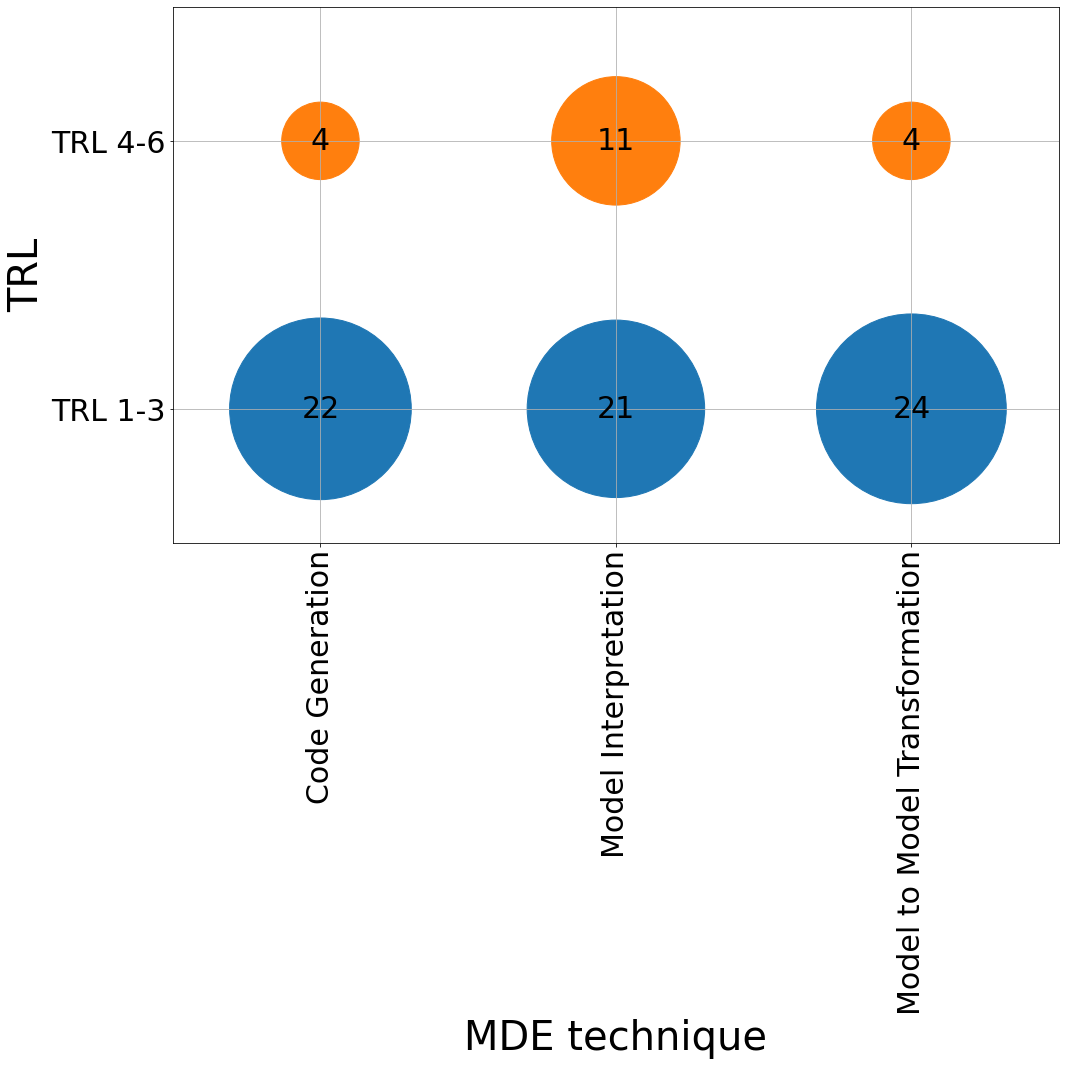

In [190]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
trl_techniques_copy = trl_techniques_copy
print(trl_techniques_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(trl_techniques_copy)
plt.xlabel("MDE technique", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + "TRL_MDE_scatter" + ".jpg")

                               Individual Systems  Processes  \
technique                                                      
Code Generation                                21          0   
Model Interpretation                           24          1   
Model to Model Transformation                  16          4   

                               Systems of\n Systems  
technique                                            
Code Generation                                   4  
Model Interpretation                              4  
Model to Model Transformation                     7  


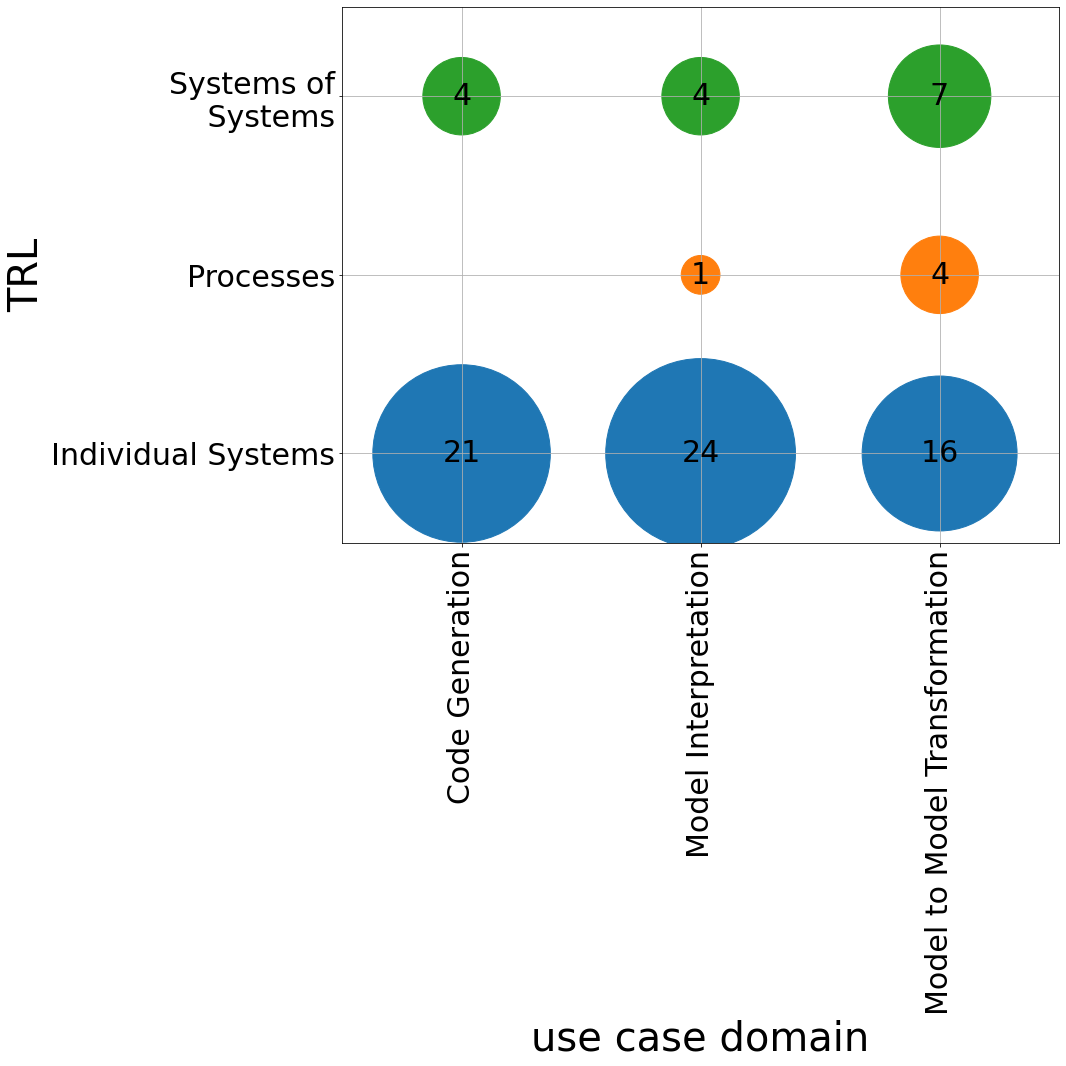

In [197]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
twinning_target_techniques_copy = twinning_target_techniques_copy
print(twinning_target_techniques_copy)
plt.figure(figsize=(15,15))
scatter_for_df(twinning_target_techniques_copy)
plt.xlabel(colnamePairs[3][1], fontsize=40)
plt.ylabel(colnamePairs[3][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "TT_mde_scatter" + ".jpg")

In [137]:
twin_lcp_techniques_copy.astype('int64').unstack()

value,As-Designed,As-Operated
technique,,
Code Generation,21,5
Model Interpretation,23,12
Model to Model Transformation,24,6


value                          As-Designed  As-Operated
technique                                              
Code Generation                         21            5
Model Interpretation                    23           12
Model to Model Transformation           24            6


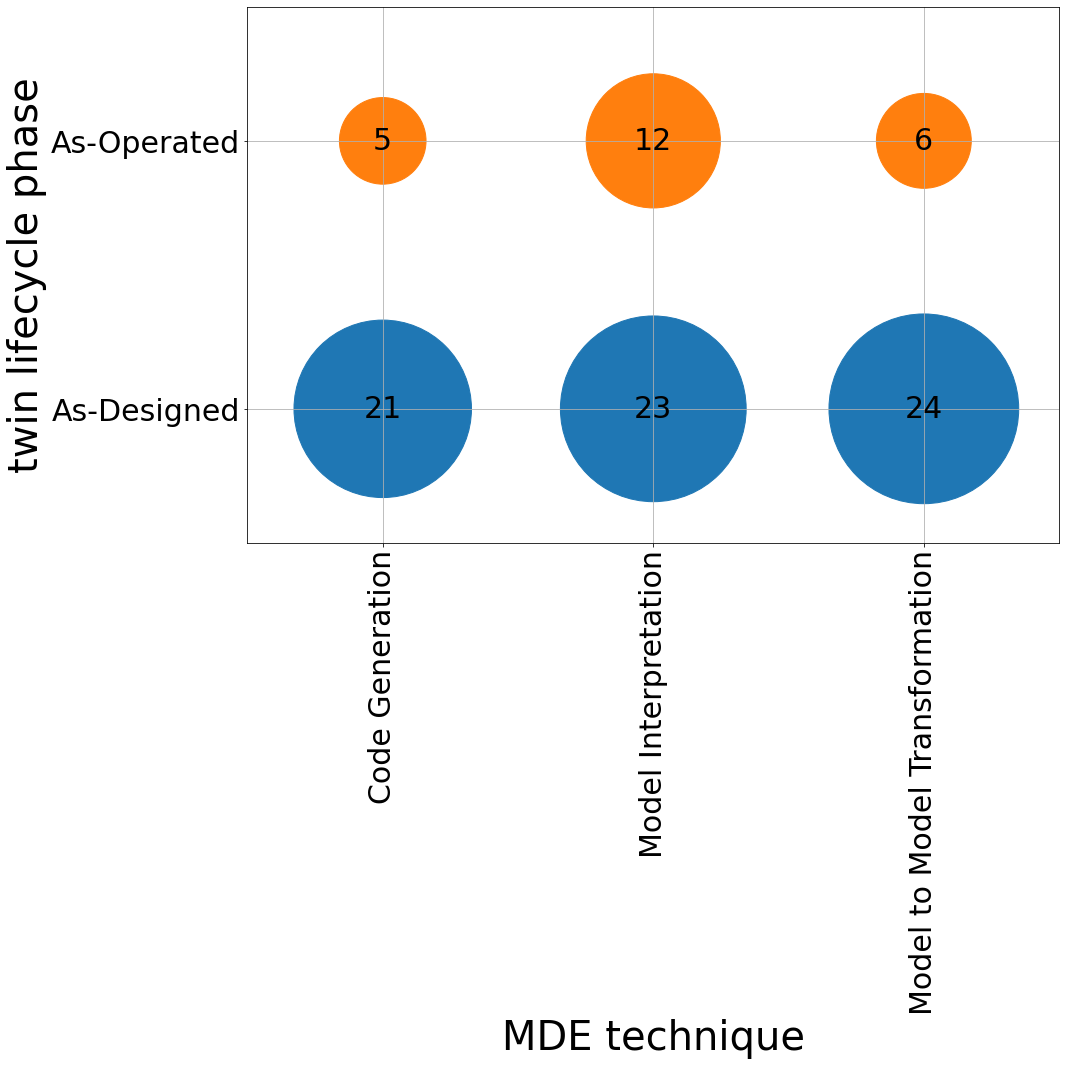

In [138]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
twin_lcp_techniques_copy = twin_lcp_techniques_copy.astype('int64').unstack()
print(twin_lcp_techniques_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(twin_lcp_techniques_copy)
plt.xlabel(colnamePairs[2][1], fontsize=40)
plt.ylabel(colnamePairs[2][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + "TLCP_MDE_scatter" + ".jpg")

                               Design  Implement  Operate
technique                                                
Code Generation                     1         19        5
Model Interpretation               12          7       13
Model to Model Transformation      16          6        5


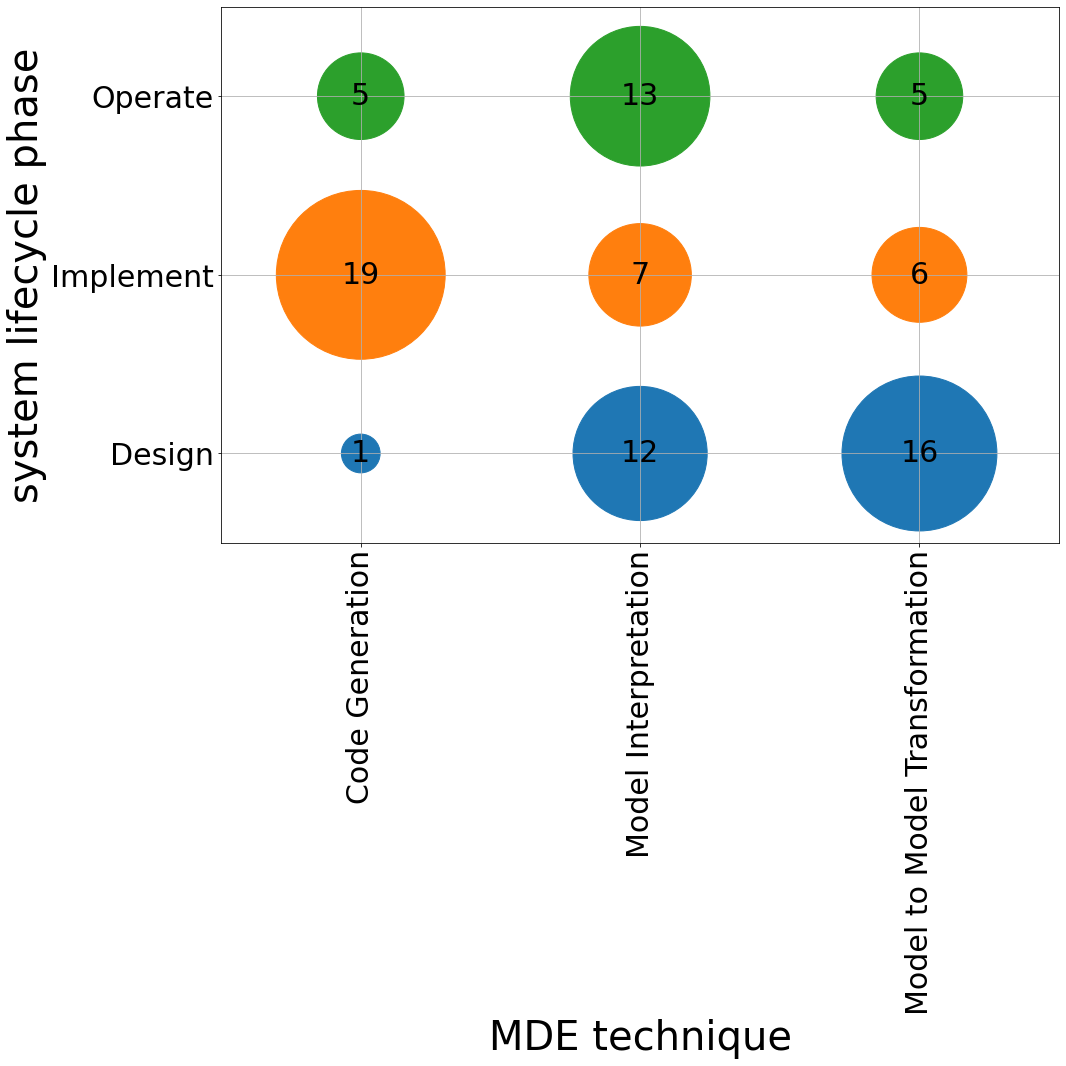

In [139]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
system_lcp_techniques_copy = system_lcp_techniques_copy[['Design', 'Implement', 'Operate']]
print(system_lcp_techniques_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(system_lcp_techniques_copy)
plt.xlabel(colnamePairs[1][1], fontsize=40)
plt.ylabel(colnamePairs[1][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "SLCP_MDE_scatter" +".jpg")

                               Accommodation  Electricity  Manufacturing  \
technique                                                                  
Code Generation                            8            2             10   
Model Interpretation                       2            1             14   
Model to Model Transformation              7            4              8   

                               Transportation\n and Storage  
technique                                                    
Code Generation                                           5  
Model Interpretation                                      9  
Model to Model Transformation                             0  


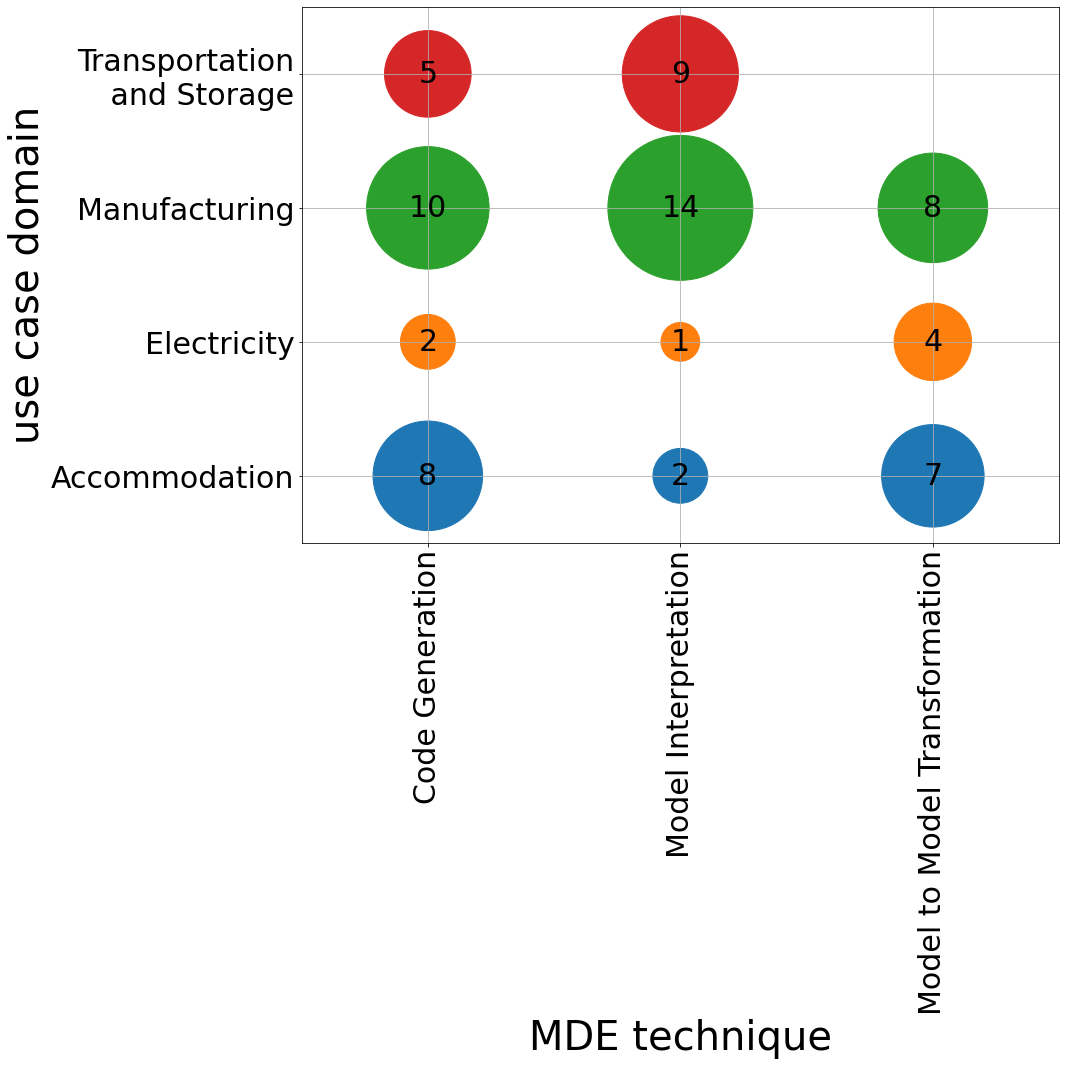

In [140]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
domains_techniques_copy = domains_techniques_copy
print(domains_techniques_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(domains_techniques_copy)
plt.xlabel(colnamePairs[0][1], fontsize=40)
plt.ylabel(colnamePairs[0][0], fontsize=40)
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 4.5)
plt.tight_layout()
plt.savefig(destination_folder + "Domain_MDE_scatter" + ".jpg")

# Bar MDE

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\1931419591.py:21: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\1931419591.py:42: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\1931419591.py:64: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is 

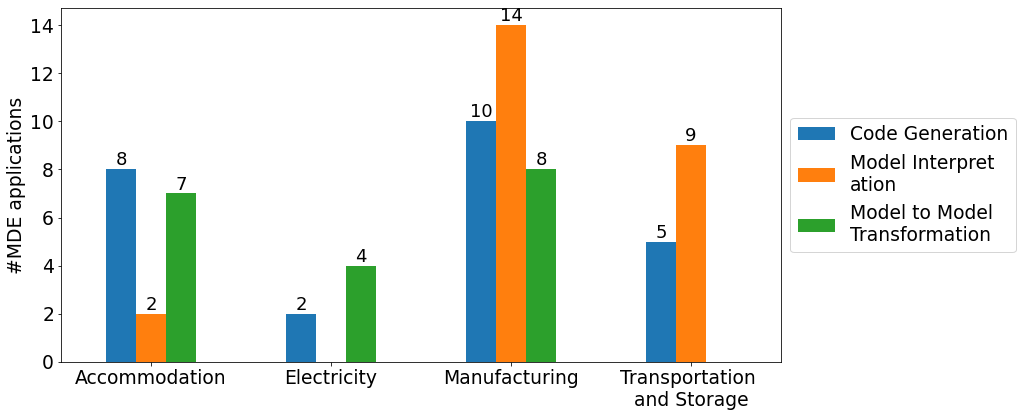

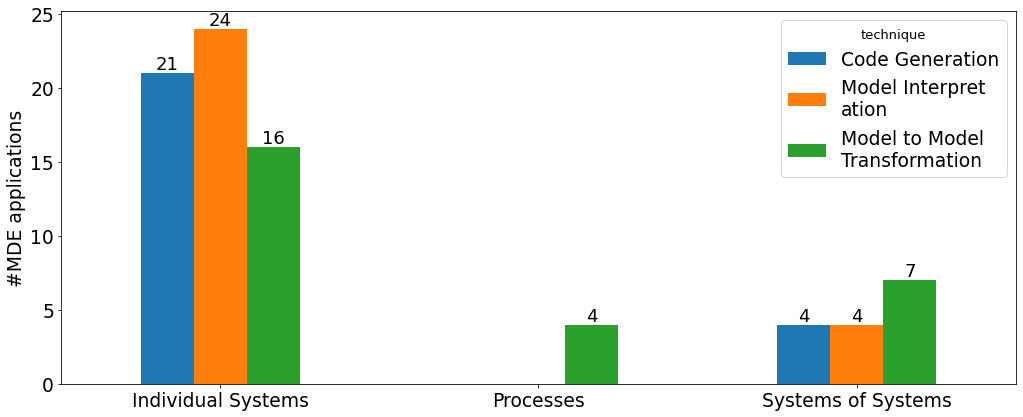

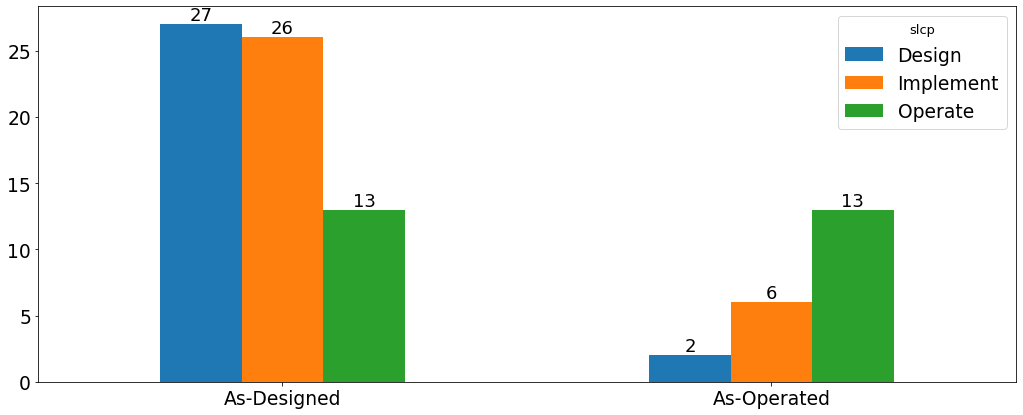

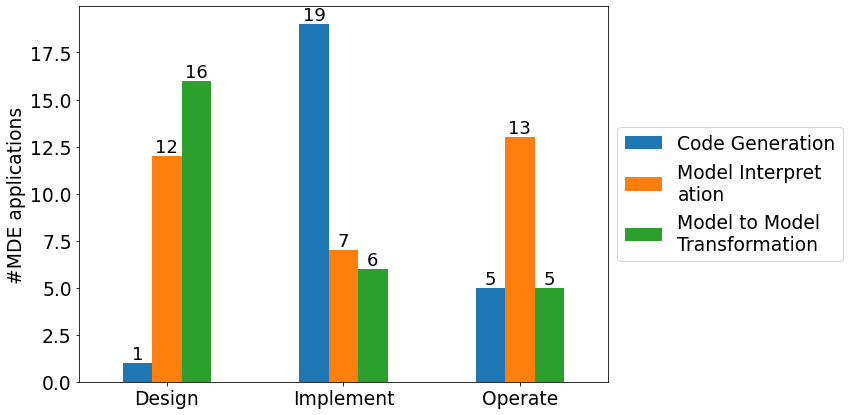

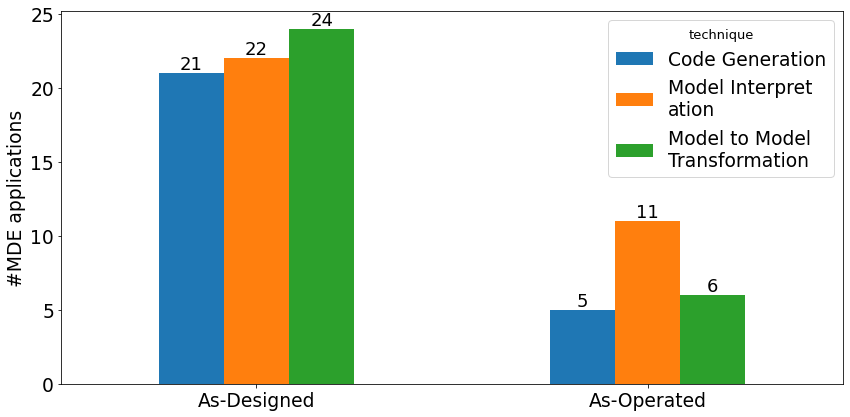

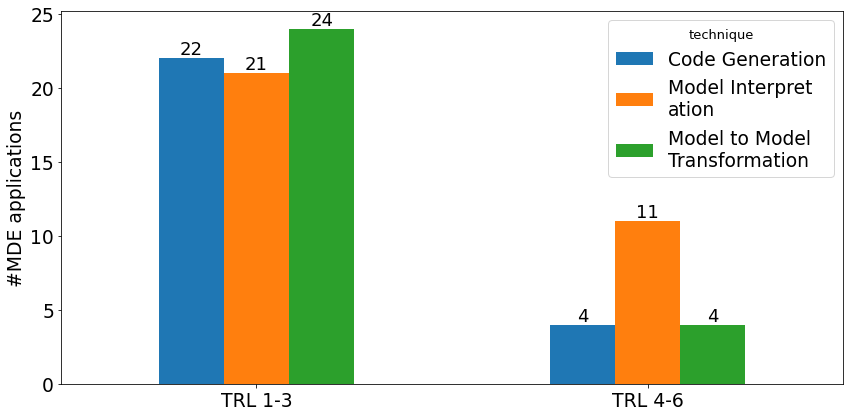

In [141]:


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
for text in domains_techniques['value']:
    if text is not None:
        if len(text) > 15:
            domains_techniques['value'] = domains_techniques['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

for text in domains_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            domains_techniques['technique'] = domains_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                             ylabel="#MDE applications",  xlabel="", rot=0)#title="Distribution of MDE techniques amongst domains",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_MDE_barchart"+ fileformat)
#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)

for text in twinning_target_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            twinning_target_techniques['technique'] = twinning_target_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques amongst domains",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TT_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
slcp_tlcp = slcp_tlcp.groupby(['value','slcp']).filter(lambda x : len(x) > 1)

for text in slcp_tlcp['slcp']:
    if text is not None:
        if len(text) > 15:
            slcp_tlcp['slcp'] = slcp_tlcp['slcp'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = slcp_tlcp.groupby(['value','slcp']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="",  xlabel="")#title="Distribution of MDE techniques amongst domains",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"slcp_tlcp_barchart"+ fileformat)

#############################



fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
system_lcp_techniques = system_lcp_techniques[(system_lcp_techniques[['value']] != 'Plan').all(axis=1)]
system_lcp_techniques= system_lcp_techniques[(system_lcp_techniques[['value']] != 'Test').all(axis=1)]
system_lcp_techniques= system_lcp_techniques[(system_lcp_techniques[['value']] != 'Maintain').all(axis=1)]
system_lcp_techniques = system_lcp_techniques#.filter(lambda x : len(x) > 1)

for text in system_lcp_techniques['technique']:
    if text is not None:
        
        if len(text) > 15:
            system_lcp_techniques['technique'] = system_lcp_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

#ax = plt.scatter(x=system_lcp_techniques['value'].to_numpy(), y=system_lcp_techniques['technique'].to_numpy())
ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques for system life cycle pahses",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
twin_lcp_techniques = twin_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
#indexlist = []
#index = 0
#for x in twin_lcp_techniques['value']:
#    if x is not None:
#        if ";" in x:
#            indexlist.append(index)
#            #print(tlcp_trl.loc[index])
#            values = twin_lcp_techniques.loc[index]['value'].split(";")
#            trl = twin_lcp_techniques.loc[index]['technique']
#            for val in values:
#                new_line = pd.DataFrame([{"value": val, "technique": trl}])
#                twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)
#    index += 1
#twin_lcp_techniques = twin_lcp_techniques.drop(indexlist)
for text in twin_lcp_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            twin_lcp_techniques['technique'] = twin_lcp_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques for twin life cycle phases",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
trl_techniques = trl_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
for text in trl_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            trl_techniques['technique'] = trl_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))
ax = trl_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="#MDE applications", xlabel="")# title="Distribution of MDE techniques amongst domains",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart"+ fileformat)

# Stacked barcharts with TRL per X

In [142]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    lang = contents["modeling language"]
    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)



In [143]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tt_trl = pd.DataFrame(columns = ['value', 'trl'])

with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"] if contents["use case domain"] in domains else None
    tt = contents["twinning target"]
    #print(domain)
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    new_line = pd.DataFrame([{"value": tt, 'trl': trl}])
    tt_trl = pd.concat([tt_trl, new_line], ignore_index=True)

    

        #print(lang[item])
    
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        lang = mdeContents["source category"]
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        new_line = pd.DataFrame([{"value": lang, 'trl': trl}])
        modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)    

        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2354911575.py:20: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2354911575.py:41: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\2354911575.py:63: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is 

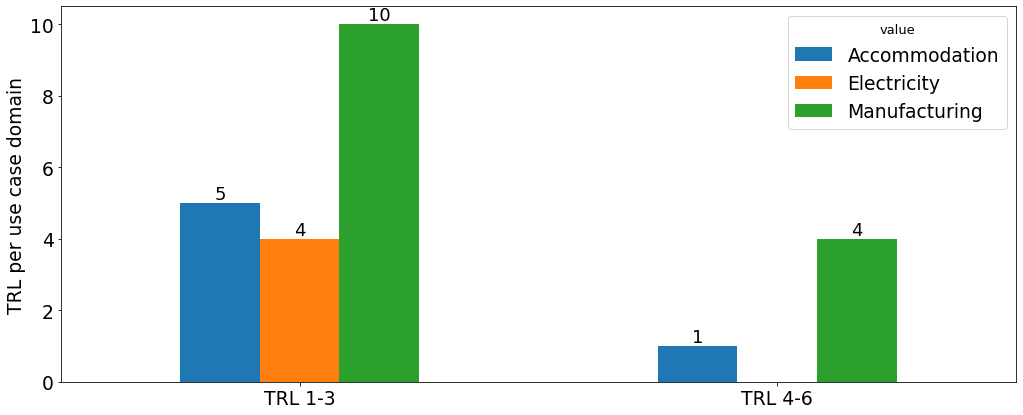

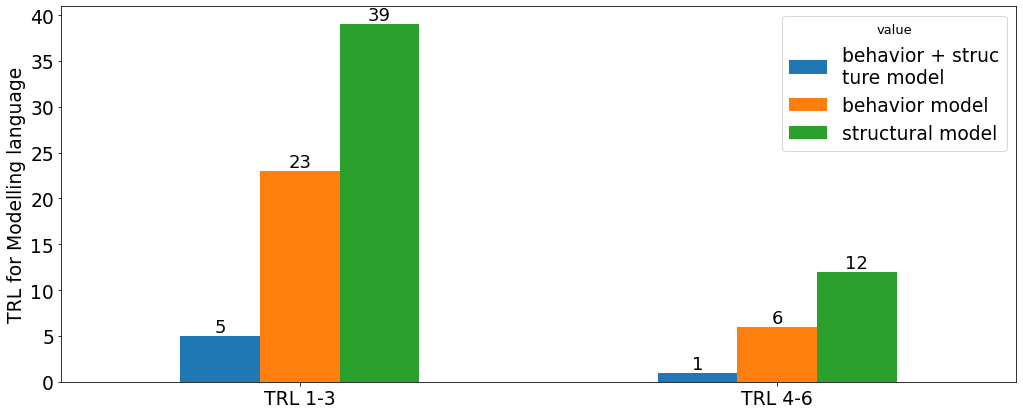

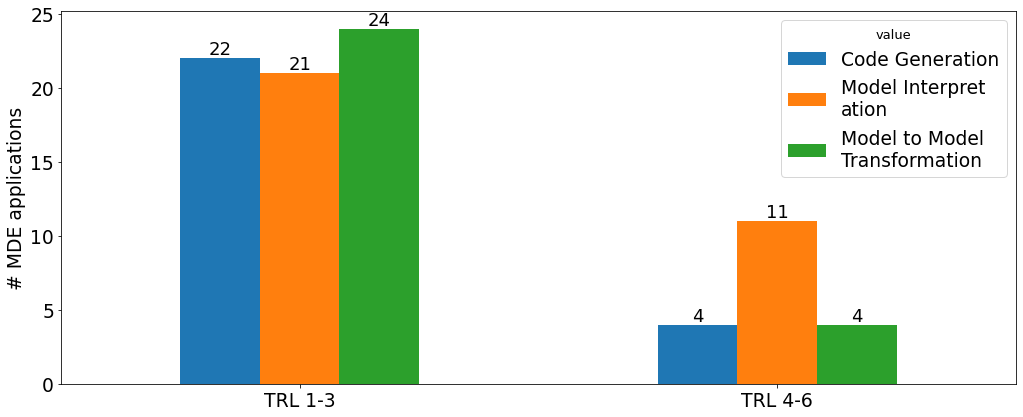

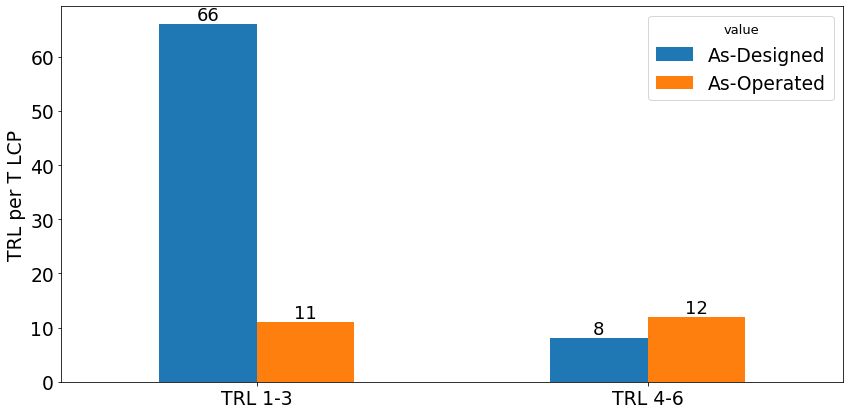

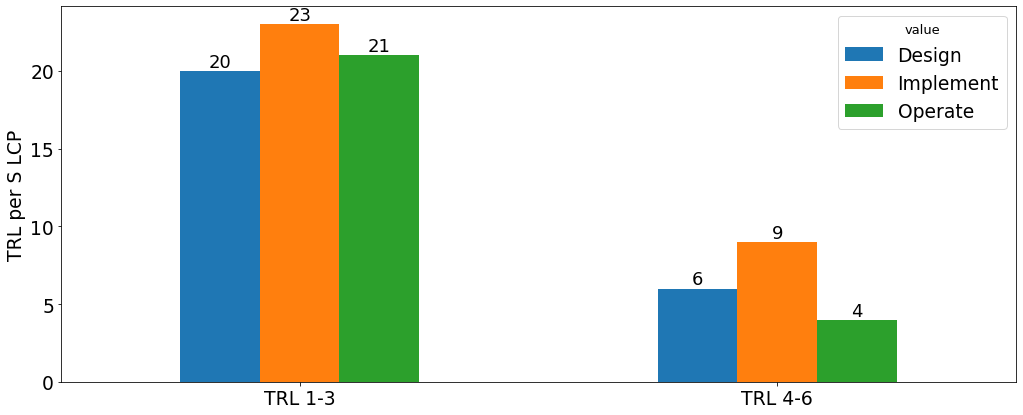

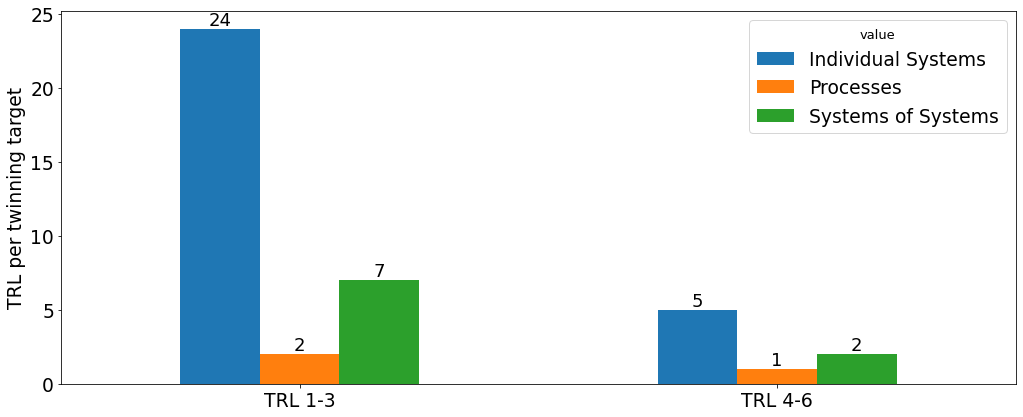

In [144]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
domain_trl = domain_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)

for text in domain_trl['value']:
    if text is not None:
        if len(text) > 15:
            domain_trl['value'] = domain_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))
            #text = re.sub("(.{13})", "\\1\n", text, 0, re.DOTALL)
            
ax = domain_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                             ylabel="TRL per use case domain",  xlabel="")#title="TRL per domain",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
dtrlList = domain_trl['value'].unique().tolist()
#dtrlList = dtrlList.sort()
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
modlang_trl = modlang_trl.groupby(['value','trl']).filter(lambda x : len(x) > 0)#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
for text in modlang_trl['value']:
    if text is not None:
        if len(text) > 16:
            modlang_trl['value'] = modlang_trl['value'].replace(text, re.sub("(.{16})", "\\1\n", text, 0, re.DOTALL))

ax = modlang_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL for Modelling language",  xlabel="")#title="TRL per modelling language",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Language_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)

for text in mde_trl['value']:
    if text is not None:
        if len(text) > 15:
            mde_trl['value'] = mde_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = mde_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="# MDE applications",  xlabel="")#title="TRL per MDE technique",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
tlcp_trl = tlcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
#ndexlist = []
#index = 0
#for x in tlcp_trl['value']:
#    if x is not None:
#        if ";" in x:
#            indexlist.append(index)
#            #print(tlcp_trl.loc[index])
#            values = tlcp_trl.loc[index]['value'].split(";")
#            trl = tlcp_trl.loc[index]['trl']
#            for val in values:
 #               new_line = pd.DataFrame([{"value": val, "trl": trl}])
#                tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
#    index += 1
#tlcp_trl = tlcp_trl.drop(indexlist)
ax = tlcp_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL per T LCP",  xlabel="")#title="TRL per DT LCP",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 2)
ax = slcp_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="TRL per S LCP",  xlabel="")#title="TRL per S LCP",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
#plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_TRL_barchart"+ fileformat)

############################
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
tt_trl = tt_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = tt_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL per twinning target",  xlabel="")#title="TRL per modelling language",
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TT_TRL_barchart"+ fileformat)

# TRL Scatter

In [145]:
todos = [
mde_trl,
domain_trl,
slcp_trl,
tlcp_trl,
tt_trl]
names = [ 'domain_trl_scatter', 'slcp_trl_scatter',
         'tlcp_trl_scatter', 'tt_trl_scatter','mde_trl_scatter']
#slcp_tlcp ]

In [146]:
domains = ['Accommodation', 'Electricity', 'Manufacturing']
mdetches = ['Code\n Generation', 'Model\n Interpretation',
       'Model to Model\n Transformation']
trls = ['TRL 1-3', 'TRL 4-6']
systems= ['Individual Systems', 'Processes', 'Systems of\n Systems']
slcs = ['Design', 'Implement','Operate']
tlcs = ['As-Designed',  'As-Operated']

In [147]:
colnamePairs = [['use case domain', 'TRL'],
                ['system lifecycle phase', 'TRL'],
                ['twin lifecycle phase', 'TRL'],
                ['twinning target', 'TRL'],
                ['MDE technique', 'TRL']]

In [148]:
mde_trl_copy = mde_trl.__deepcopy__()
domain_trl_copy = domain_trl.__deepcopy__()
slcp_trl_copy = slcp_trl.__deepcopy__()
tlcp_trl_copy= tlcp_trl.__deepcopy__()
tt_trl_copy = tt_trl.__deepcopy__()

In [149]:
i = 0
for item in todos:
    print(names[i])
    for col in item.columns:
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
        print(item1.columns)
        print(item1.transpose().columns)
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1
    print("_________")
#        print(item1.columns)
#        print(item1.transpose().columns)

domain_trl_scatter
Index(['Code Generation', 'Model Interpret\nation',
       'Model to Model \nTransformation'],
      dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')
Index(['Code Generation', 'Model Interpret\nation',
       'Model to Model \nTransformation'],
      dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')
_________
slcp_trl_scatter
Index(['Accommodation', 'Electricity', 'Manufacturing'], dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')
Index(['Accommodation', 'Electricity', 'Manufacturing'], dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')
_________
tlcp_trl_scatter
Index(['Design', 'Implement', 'Operate'], dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')
Index(['Design', 'Implement', 'Operate'], dtype='object', name='value')
Index(['TRL 1-3', 'TRL 4-6'], dtype='object', name='trl')

In [150]:
mde_trl_copy = mde_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
domain_trl_copy = domain_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
slcp_trl_copy = slcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tlcp_trl_copy = tlcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tt_trl_copy = tt_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')


In [151]:
mde_trl_copy.columns = ['Code Generation', 'Model\nInterpretation',
       'Model to Model \nTransformation']

In [152]:
tt_trl_copy

value,Individual Systems,Processes,Systems of Systems
trl,,,
TRL 1-3,24,2,7
TRL 4-6,5,1,2


value    Accommodation  Electricity  Manufacturing
trl                                               
TRL 1-3              5            4             10
TRL 4-6              1            0              4


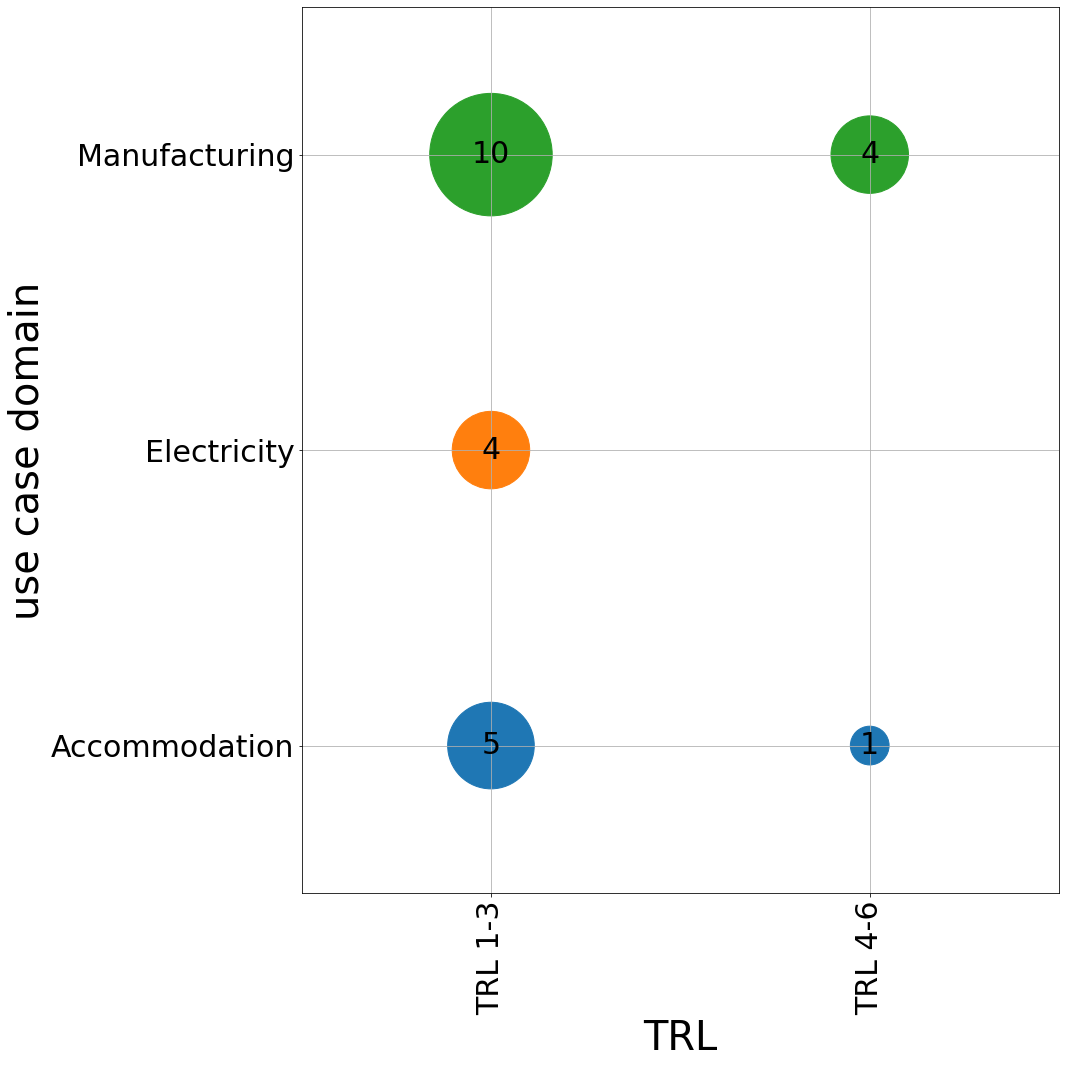

In [153]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
domain_trl_copy = domain_trl_copy
print(domain_trl_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(domain_trl_copy)
plt.xlabel(colnamePairs[0][1], fontsize=40)
plt.ylabel(colnamePairs[0][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[0]+".jpg")

value    Design  Implement  Operate
trl                                
TRL 1-3      20         23       21
TRL 4-6       6          9        4


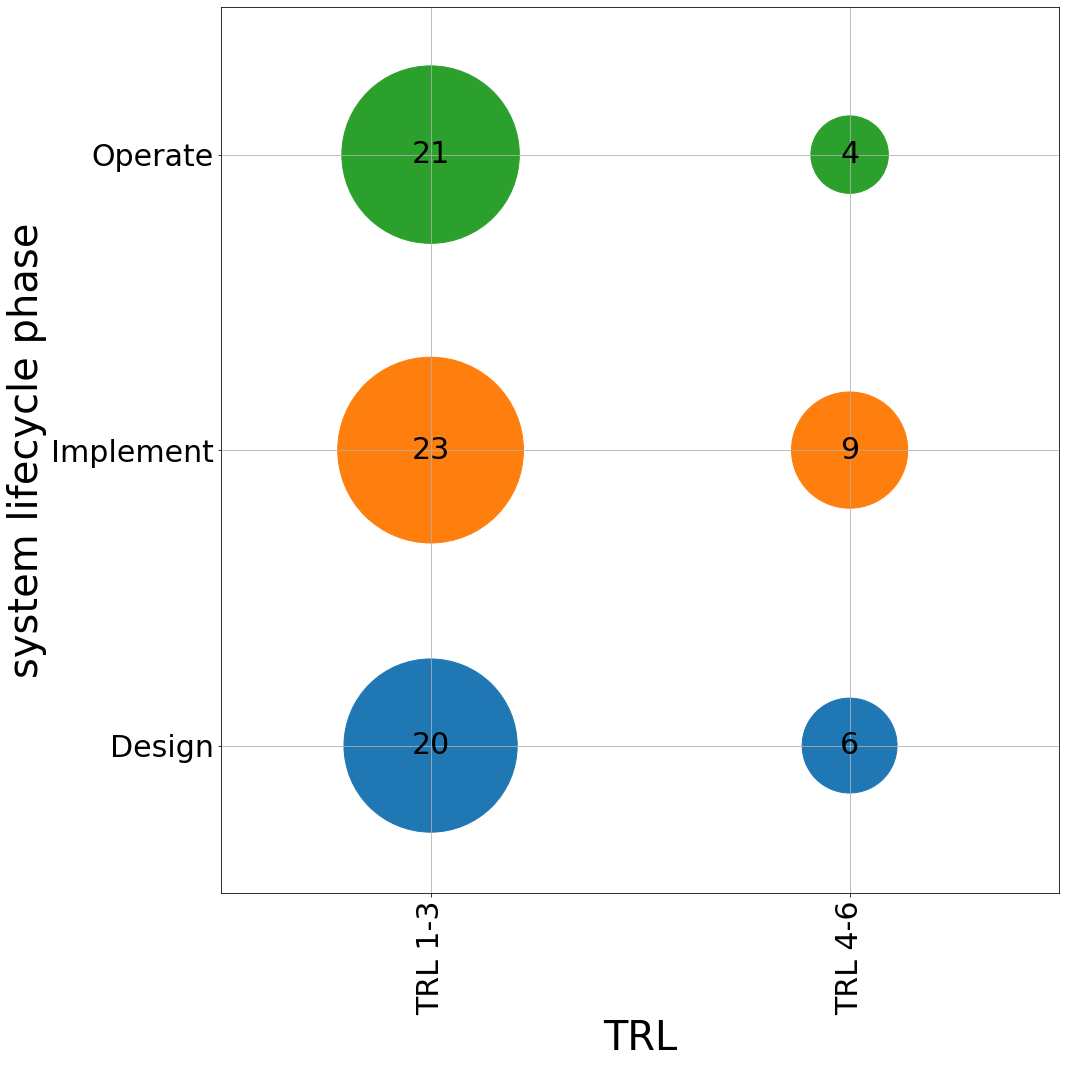

In [154]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
slcp_trl_copy = slcp_trl_copy[slcs]
print(slcp_trl_copy)
plt.figure(figsize=(15,15))
scatter_for_df(slcp_trl_copy)
plt.xlabel(colnamePairs[1][1], fontsize=40)
plt.ylabel(colnamePairs[1][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[1]+".jpg")

value    As-Designed  As-Operated
trl                              
TRL 1-3           66           11
TRL 4-6            8           12


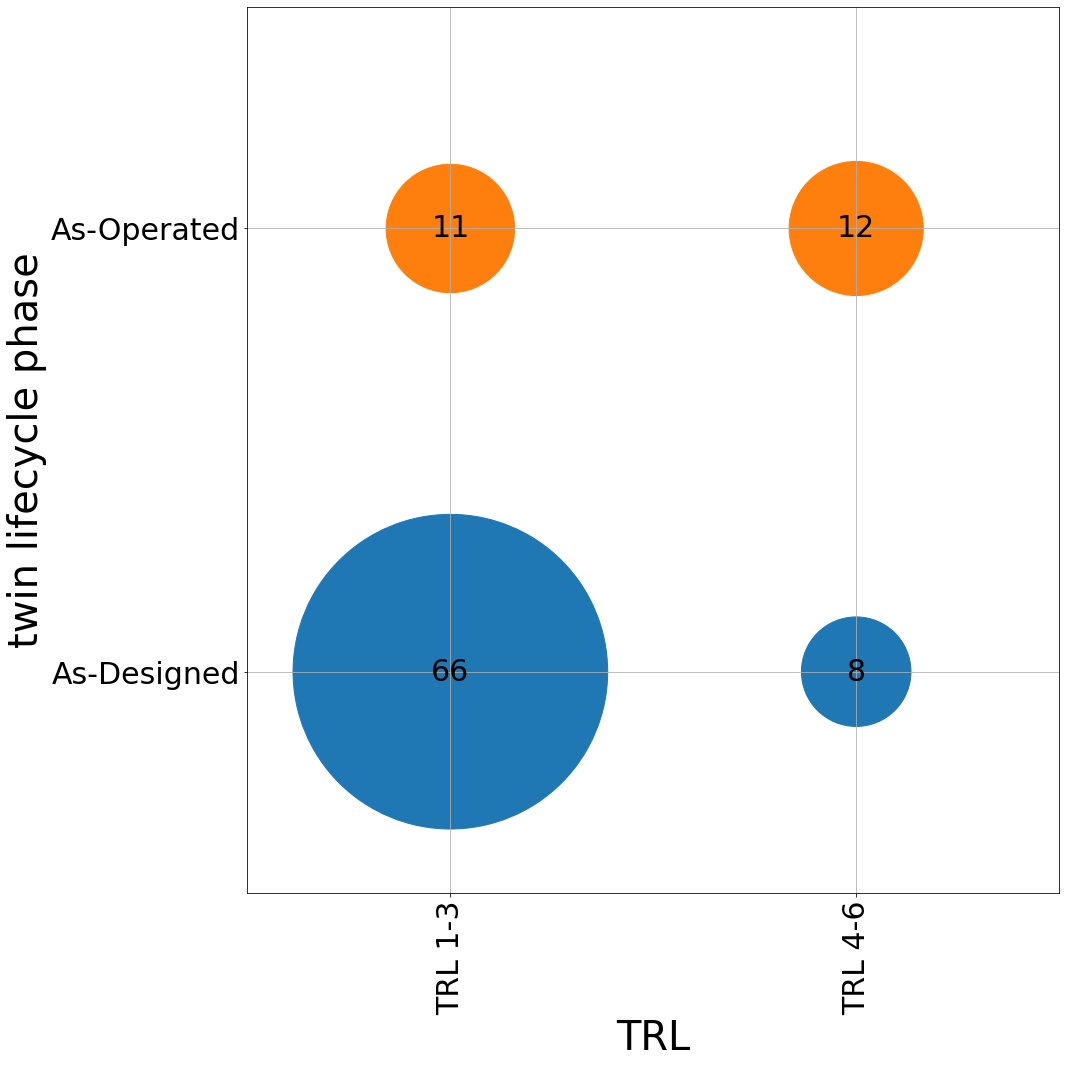

In [155]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
tlcp_trl_copy = tlcp_trl_copy[tlcs]
print(tlcp_trl_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(tlcp_trl_copy)
plt.xlabel(colnamePairs[2][1], fontsize=40)
plt.ylabel(colnamePairs[2][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + names[2]+".jpg")

value    Individual Systems  Processes  Systems of Systems
trl                                                       
TRL 1-3                  24          2                   7
TRL 4-6                   5          1                   2


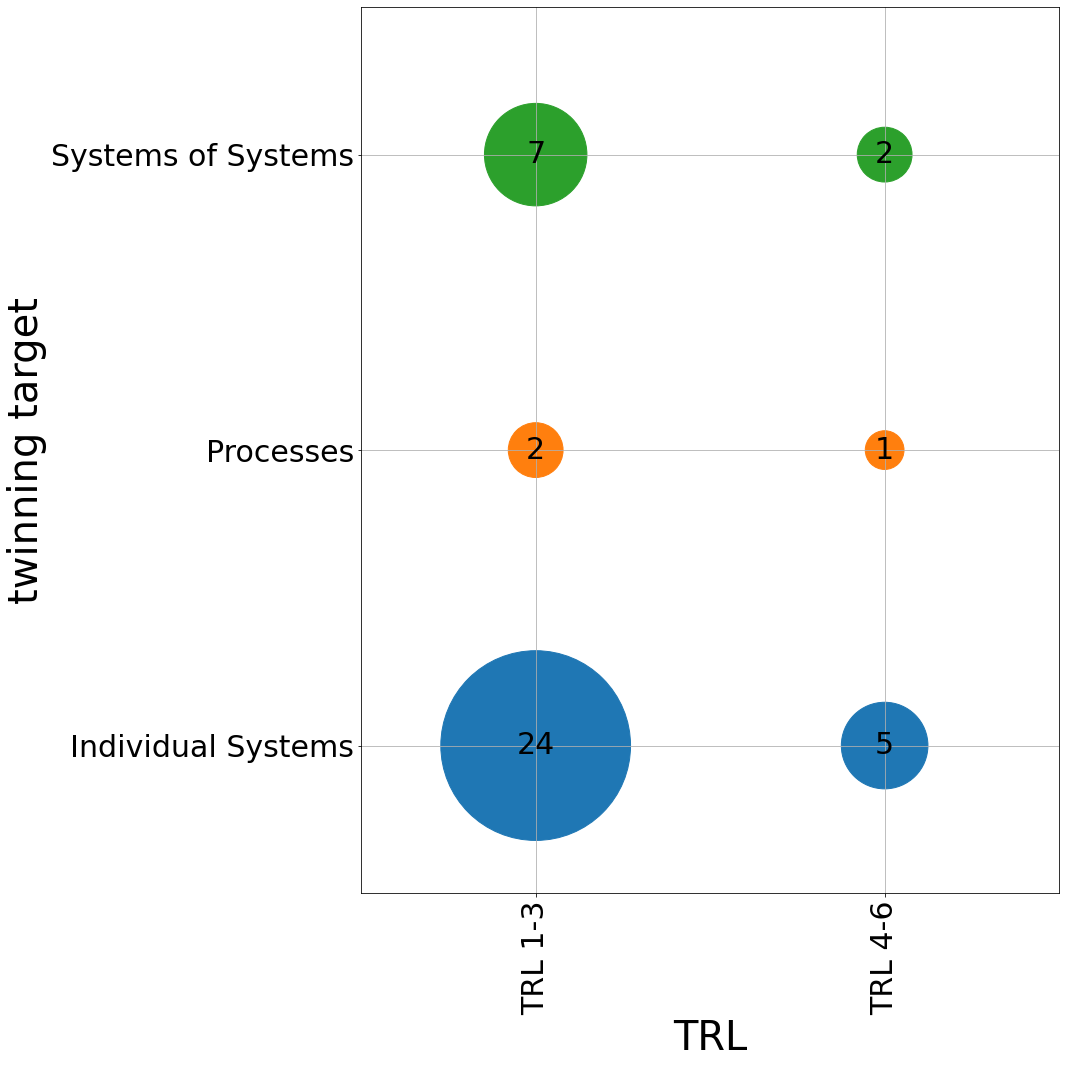

In [156]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
tt_trl_copy = tt_trl_copy
print(tt_trl_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(tt_trl_copy)
plt.xlabel(colnamePairs[3][1], fontsize=40)
plt.ylabel(colnamePairs[3][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[3]+".jpg")

                               TRL 1-3  TRL 4-6
technique                                      
Code Generation                     22        4
Model Interpretation                21       11
Model to Model Transformation       24        4


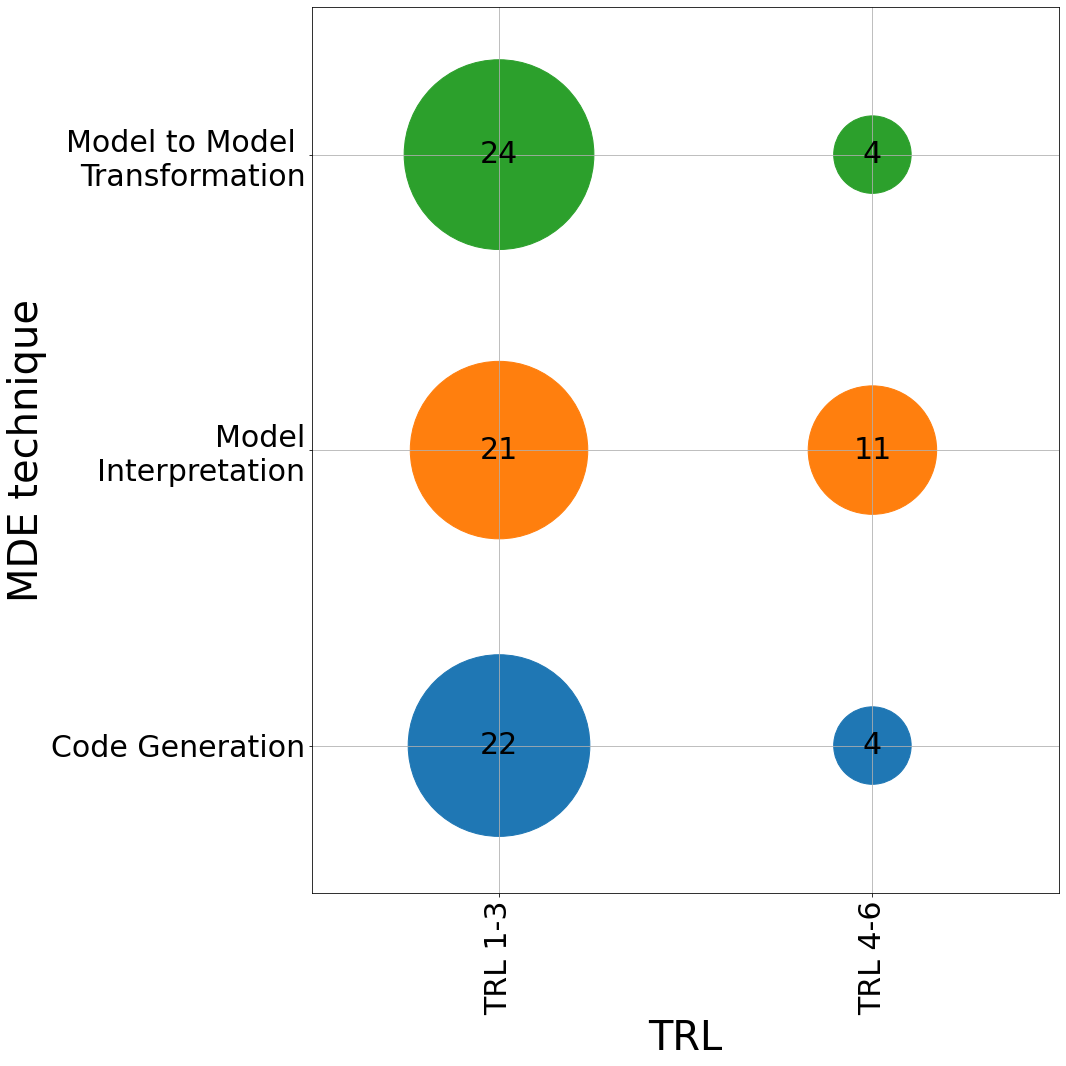

In [157]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
mde_trl_copy = mde_trl_copy
print(trl_techniques_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(mde_trl_copy)
plt.xlabel(colnamePairs[4][1], fontsize=40)
plt.ylabel(colnamePairs[4][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[4]+".jpg")

# Stacked Barcharts with Domain per X

In [158]:
import re

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\3873847391.py:62: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\3873847391.py:83: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_21904\3873847391.py:105: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is

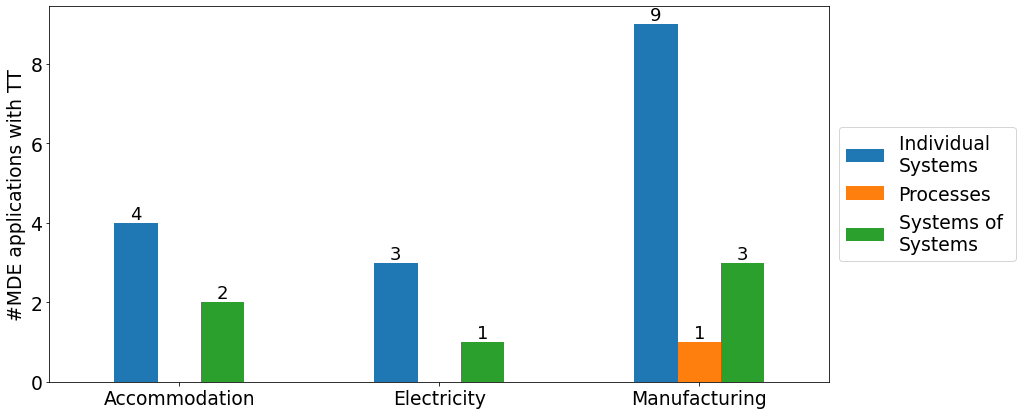

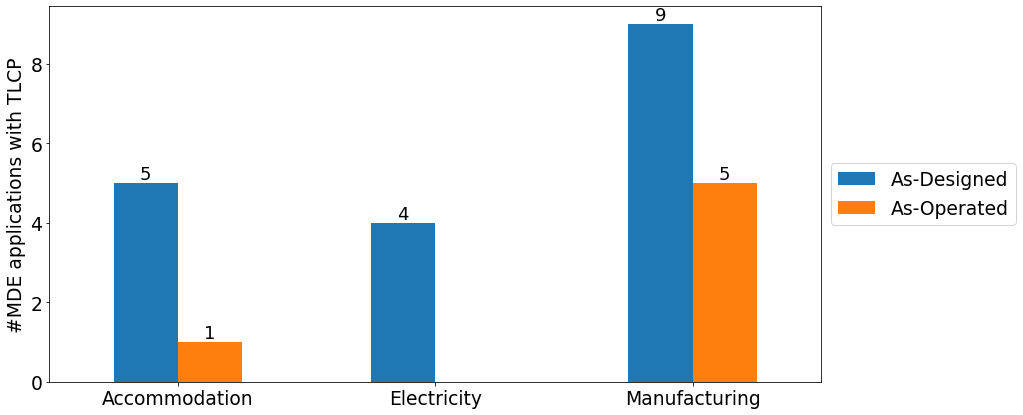

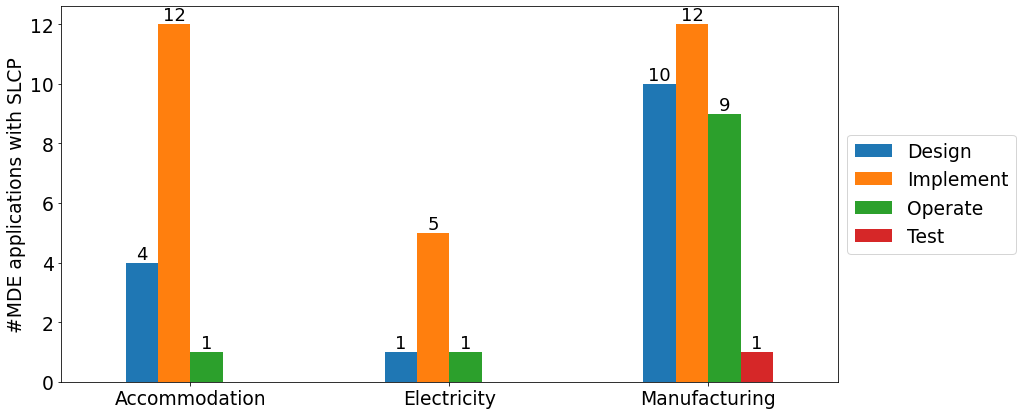

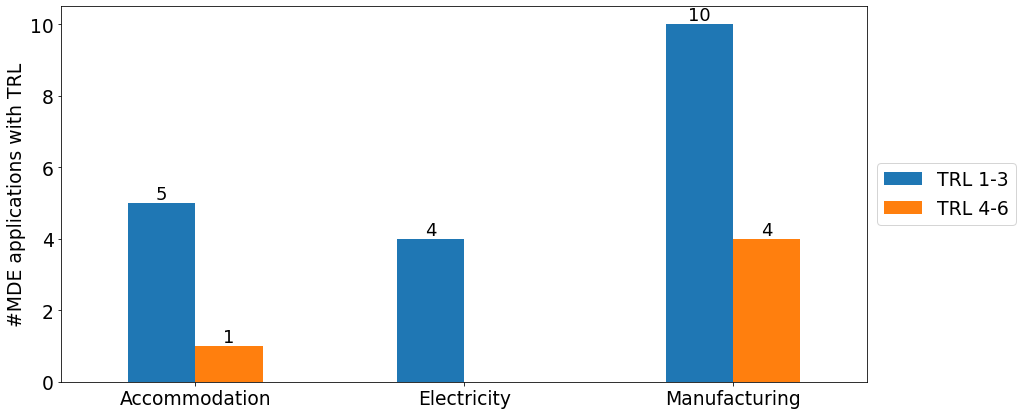

In [159]:
ucd_tt = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_tlcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_slcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_trl = pd.DataFrame(columns = ['value', 'use case domain'])



with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
for title, contents in data_semistr.items():
    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"] if contents["use case domain"] in domains else None

    

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            slcp = mdeContents['system lifecycle phase']

            new_line = pd.DataFrame([{"value": slcp, 'use case domain': ucd}])
            ucd_slcp = pd.concat([ucd_slcp, new_line], ignore_index=True)
            
        new_line = pd.DataFrame([{"value": tt, 'use case domain': ucd}])
        ucd_tt = pd.concat([ucd_tt, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": trl, 'use case domain': ucd}])
        ucd_trl = pd.concat([ucd_trl, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": tlcp, 'use case domain': ucd}])
        ucd_tlcp = pd.concat([ucd_tlcp, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_tt = ucd_tt#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_tt['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tt['use case domain'] = ucd_tt['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tt['use case domain'].replace(' ', '\n', regex=True, inplace=True)

for text in ucd_tt['value']:
    if text is not None:
        if len(text) > 11:
            ucd_tt['value'] = ucd_tt['value'].replace(text, re.sub("(.{11})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_tt.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                             ylabel="#MDE applications with TT", xlabel="")#, title="domain tt"
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TT_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
#ucd_tlcp = ucd_tlcp.groupby(['use case domain','value'])
ucd_tlcp = ucd_tlcp#.filter(lambda x : len(x) > 0)#.groupby(['value','use case domain'])
#for text in ucd_tlcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tlcp['use case domain'] = ucd_tlcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tlcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_tlcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                         ylabel="#MDE applications with TLCP",  xlabel="")#title="domain tlcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_slcp = ucd_slcp#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_slcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_slcp['use case domain'] = ucd_slcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_slcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_slcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#MDE applications with SLCP",  xlabel="")#title="domain slcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)

plt.tight_layout()
plt.savefig(destination_folder+"Domain_SLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_trl = ucd_trl#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
#for text in ucd_trl['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_trl['use case domain'] = ucd_trl['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_trl['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_trl.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#MDE applications with TRL", xlabel="")# title="domain trl",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart"+ fileformat)

# Scatter per domain

In [160]:
todos = [
ucd_tt,
ucd_tlcp,
ucd_slcp,
ucd_trl]
names = [ 'domain_tt_scatter', 'domain_tlcp_scatter',
         'domain_slcp_scatter', 'domain_trl_scatter']
#slcp_tlcp ]

In [161]:
colnamePairs = [['twinning target', 'use case domain'],
                ['twin lifecycle phase', 'use case domain'],
                ['system lifecycle phase', 'use case domain'],
                ['TRL', 'use case domain'],
                ]

In [162]:
ucd_tt_copy = ucd_tt.__deepcopy__()
ucd_tlcp_copy = ucd_tlcp.__deepcopy__()
ucd_slcp_copy = ucd_slcp.__deepcopy__()
ucd_trl_copy = ucd_trl.__deepcopy__()

In [163]:
ucd_tt_copy = ucd_tt_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_tlcp_copy = ucd_tlcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_slcp_copy = ucd_slcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_trl_copy = ucd_trl_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')


In [164]:
ucd_slcp_copy.replace(0, np.nan, inplace=True)

In [165]:
ucd_slcp_copy.dropna(axis=1, inplace=True)

In [166]:
ucd_trl_copy

value,TRL 1-3,TRL 4-6
use case domain,,
Accommodation,5,1
Electricity,4,0
Manufacturing,10,4


In [191]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500)
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

value            Individual \nSystems  Processes  Systems of \nSystems
use case domain                                                       
Accommodation                       4          0                     2
Electricity                         3          0                     1
Manufacturing                       9          1                     3


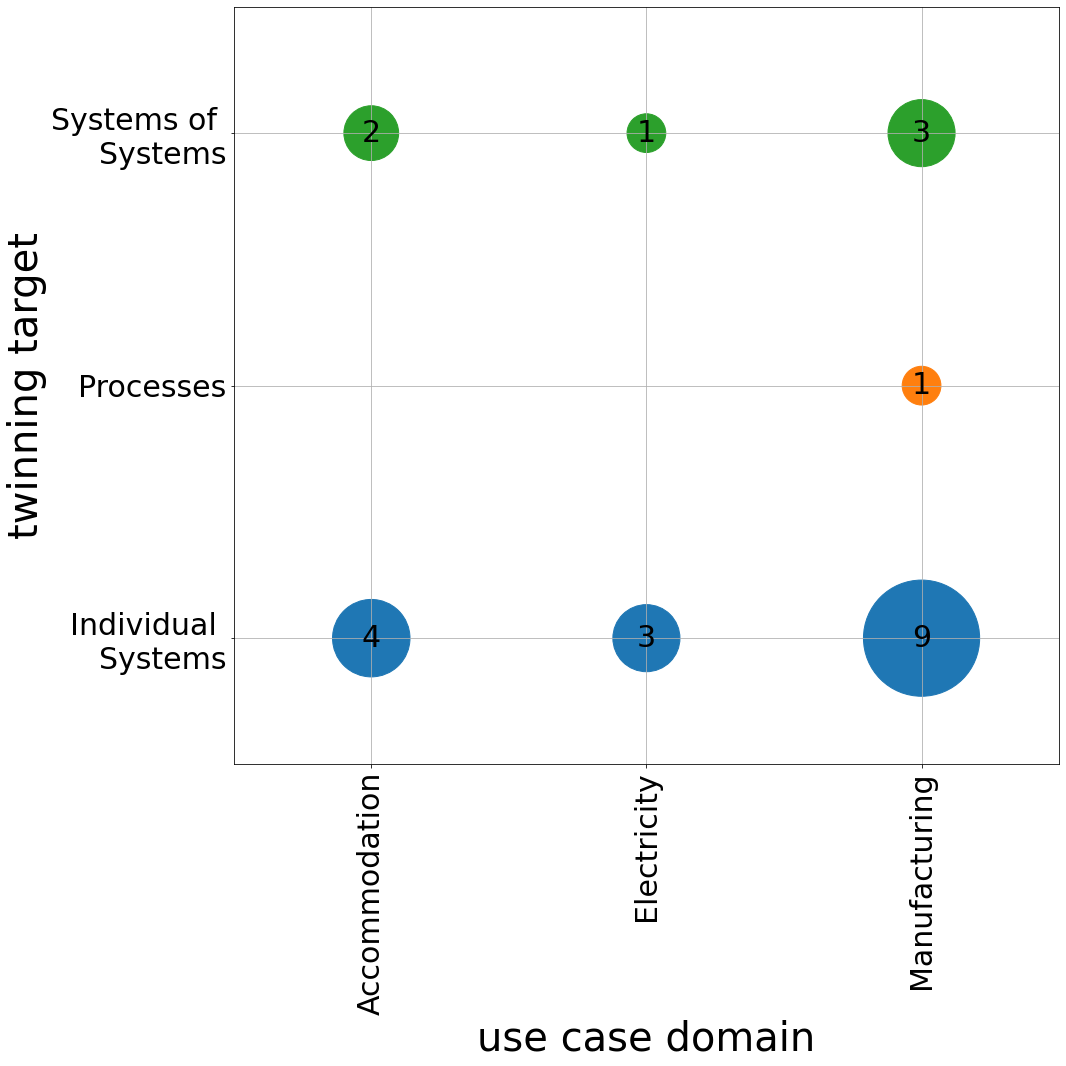

In [193]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tt_copy = ucd_tt_copy
print(ucd_tt_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(ucd_tt_copy)
plt.xlabel(colnamePairs[0][1], fontsize=40)
plt.ylabel(colnamePairs[0][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[0]+".jpg")

value            As-Designed  As-Operated
use case domain                          
Accommodation              5            1
Electricity                4            0
Manufacturing              9            5


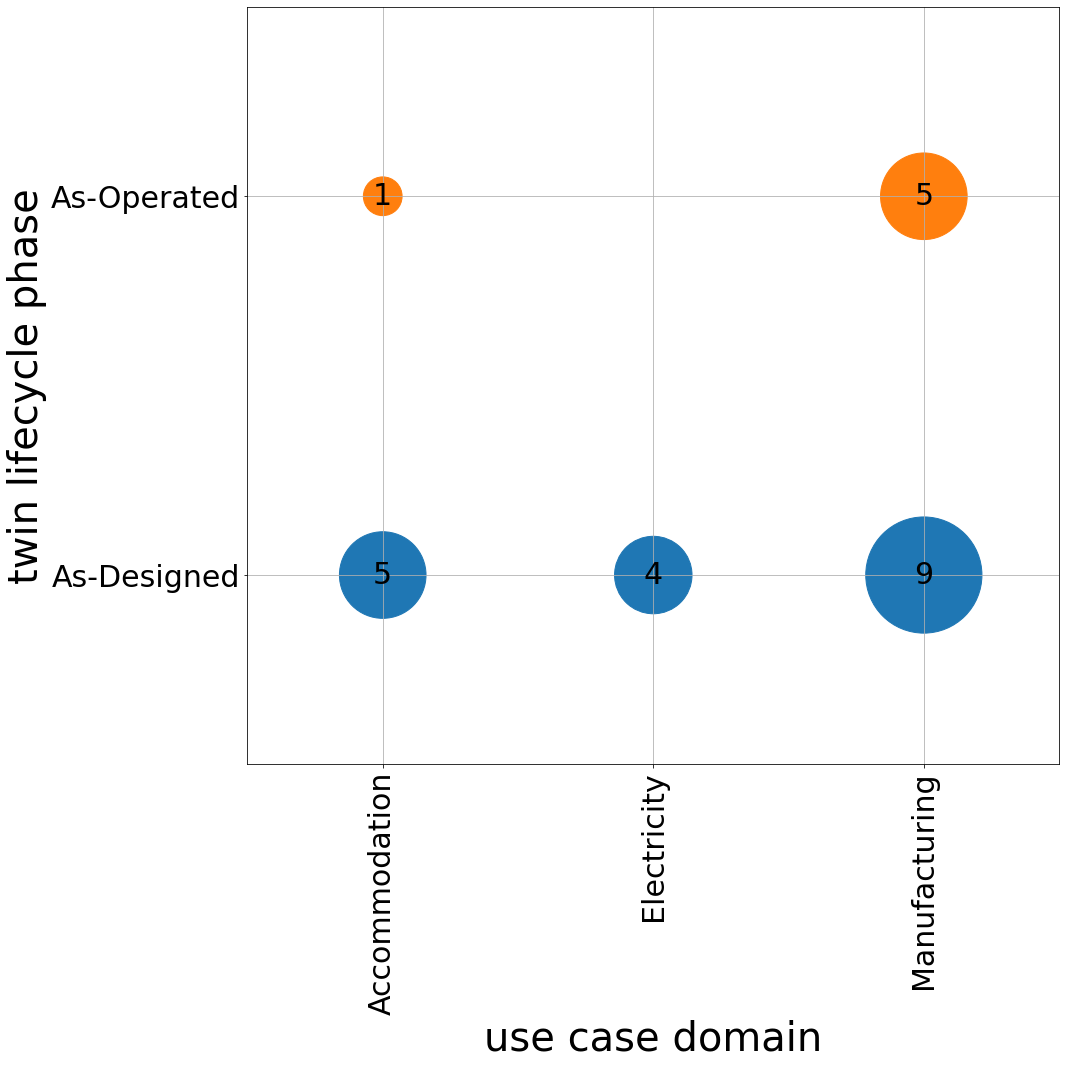

In [194]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tlcp_copy = ucd_tlcp_copy
print(ucd_tlcp_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(ucd_tlcp_copy)
plt.xlabel(colnamePairs[1][1], fontsize=40)
plt.ylabel(colnamePairs[1][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + names[1]+".jpg")

value            Design  Implement  Operate
use case domain                            
Accommodation         4         12        1
Electricity           1          5        1
Manufacturing        10         12        9


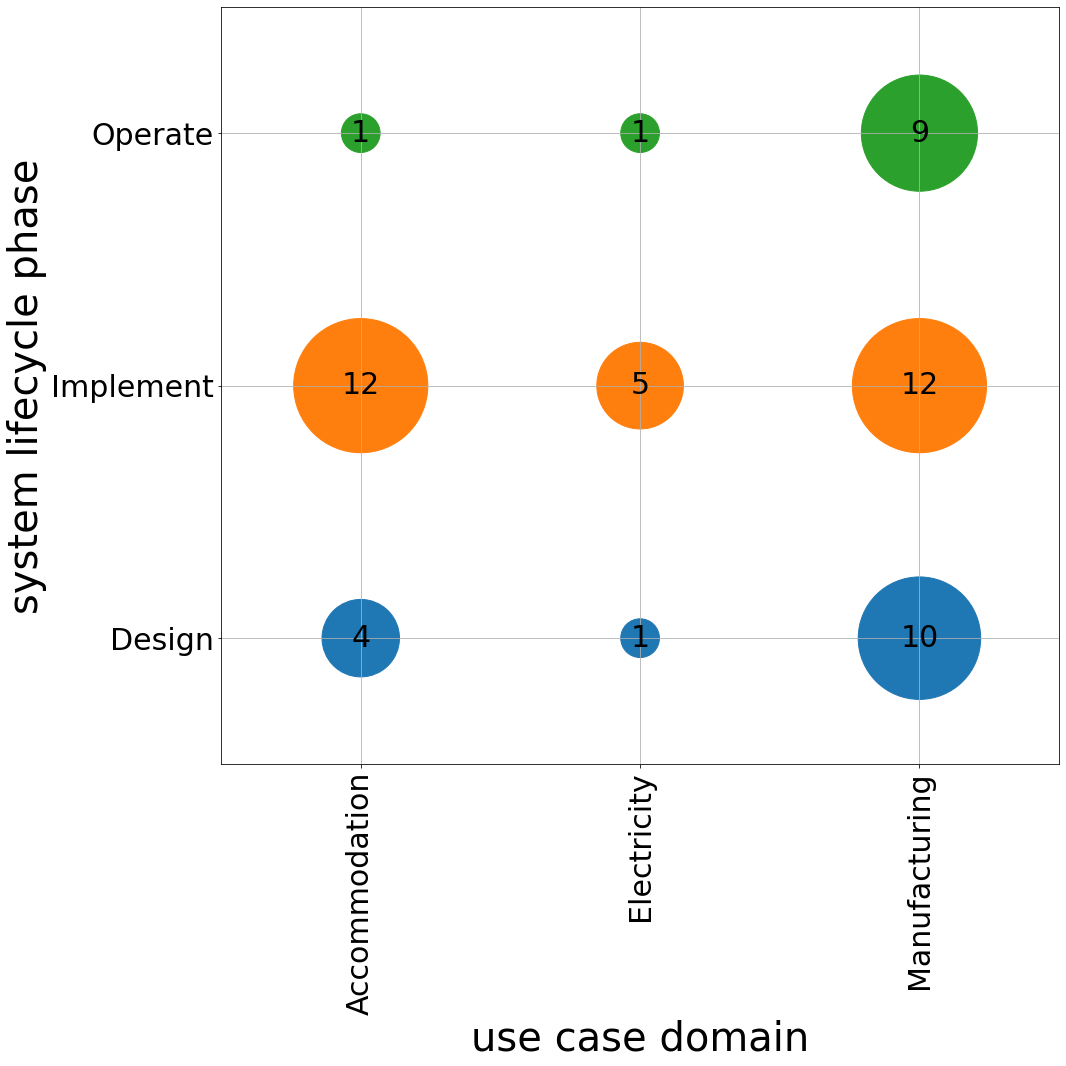

In [195]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_slcp_copy = ucd_slcp_copy
print(ucd_slcp_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(ucd_slcp_copy)
plt.xlabel(colnamePairs[2][1], fontsize=40)
plt.ylabel(colnamePairs[2][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + names[2]+".jpg")

value            TRL 1-3  TRL 4-6
use case domain                  
Accommodation          5        1
Electricity            4        0
Manufacturing         10        4


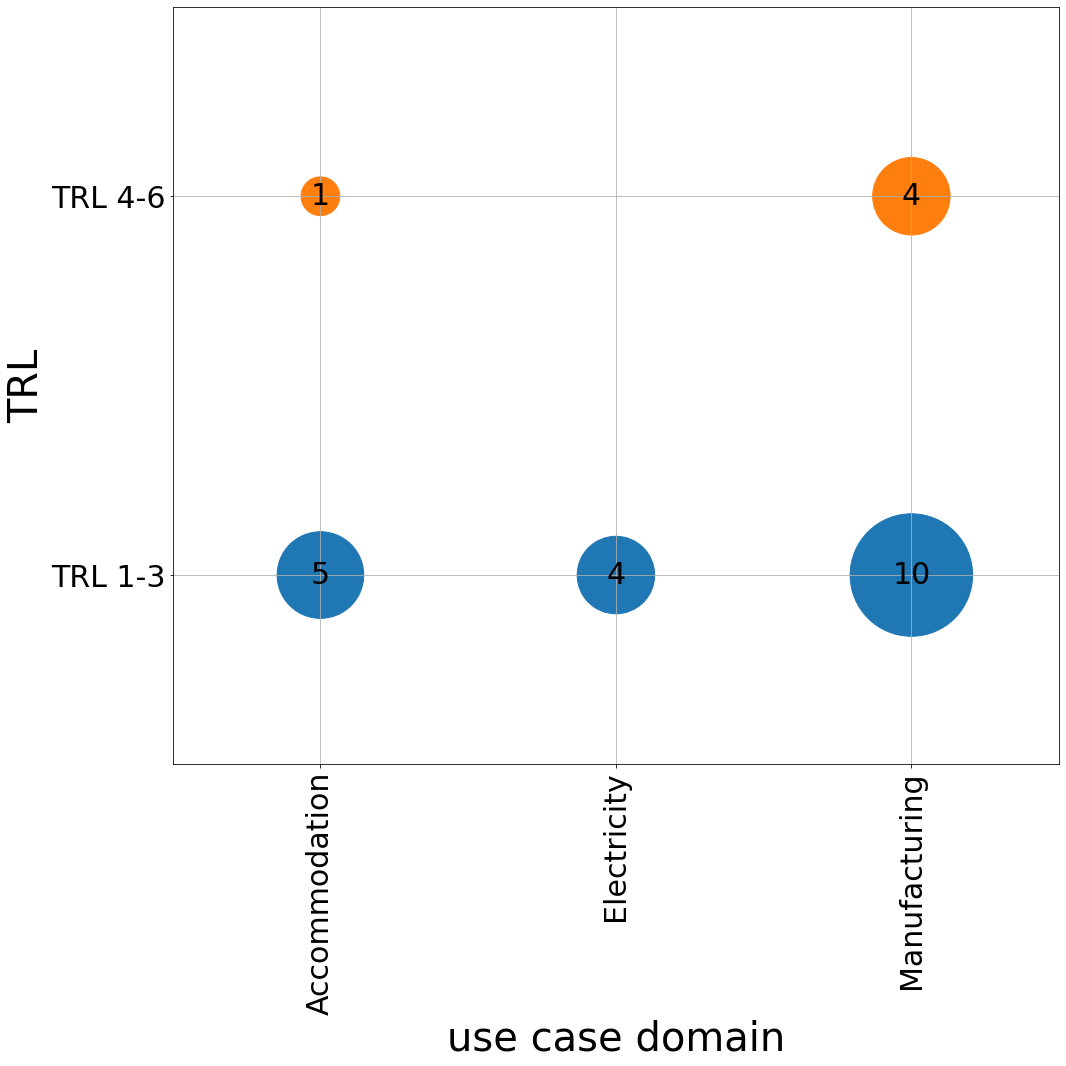

In [196]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_trl_copy = ucd_trl_copy
print(ucd_trl_copy)
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(ucd_trl_copy)
plt.xlabel(colnamePairs[3][1], fontsize=40)
plt.ylabel(colnamePairs[3][0], fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + names[3]+".jpg")